In [1]:
# system
import glob
import time
import os
import logging
import sys

# scipy
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# grandlib
import grand.dataio.root_trees as rt

import tools


%matplotlib inline
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

Welcome to JupyROOT 6.26/10


In [50]:
bkg_pulse_file     = '/sps/grand/pcorrea/nutrig/database/bkg/bkg_dataset_nutrig_gp13_test_seed_300.npz'
f                 = np.load(bkg_pulse_file)
bkg_sample        = f['traces']
bkg_pretrig_times = f['pretrig_times']
rms = tools.rms(f['traces'],axis=2)
max_traces = np.max(np.abs(f['traces']),axis=2)/rms


(array([[  57., 2398., 1115.,  158.,   79.,   68.,   51.],
        [  66., 2490., 1267.,  134.,   29.,   13.,    6.],
        [  77., 3049.,  679.,   75.,   52.,   42.,   26.]]),
 array([2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 3 BarContainer objects>)

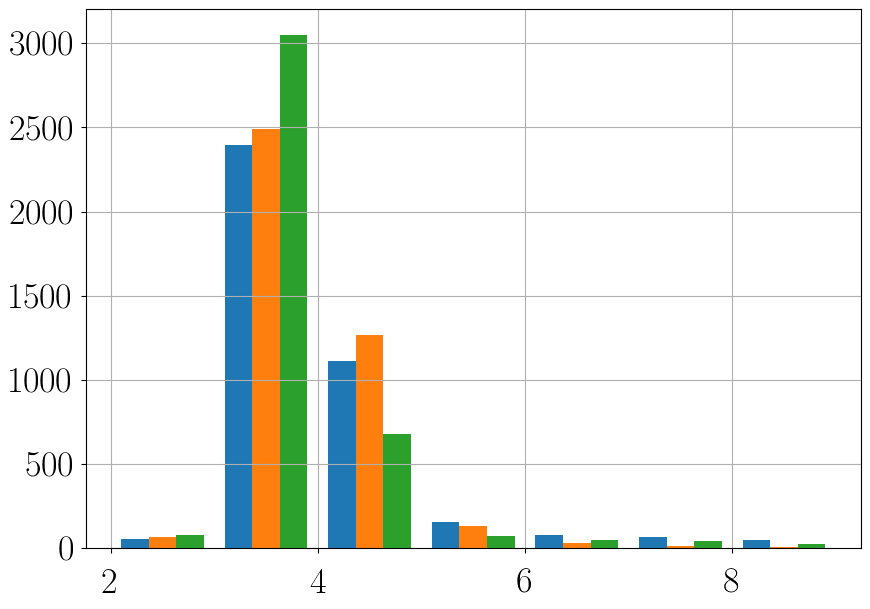

In [53]:
bins = np.arange(2,10)
plt.hist(max_traces,bins=bins)

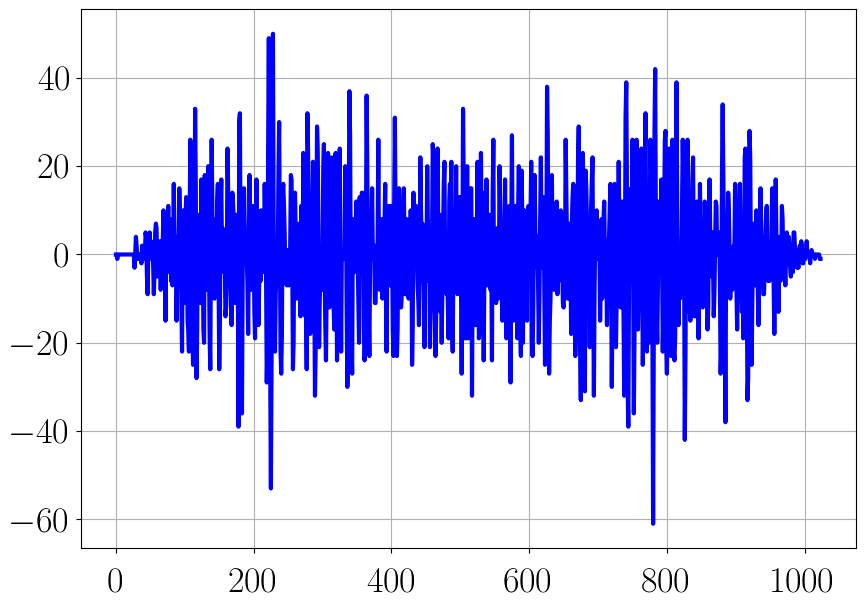

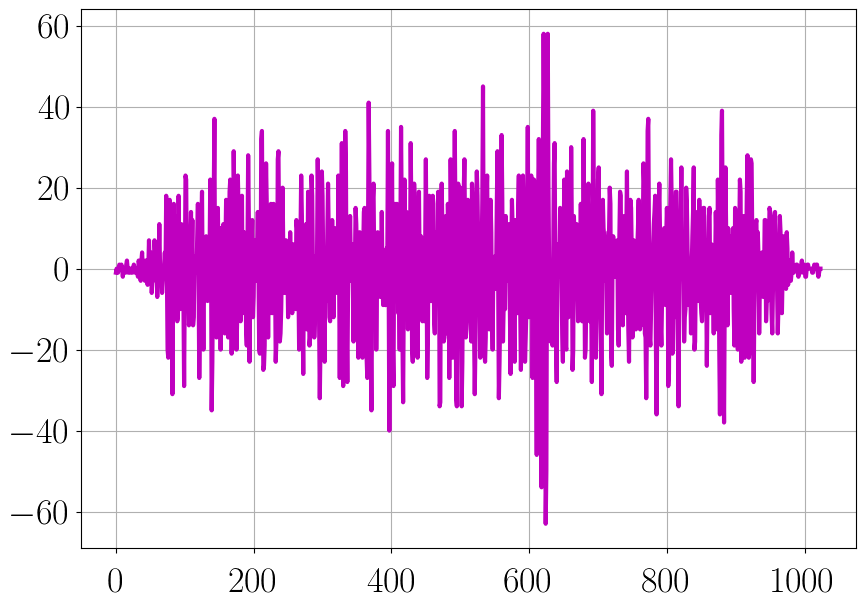

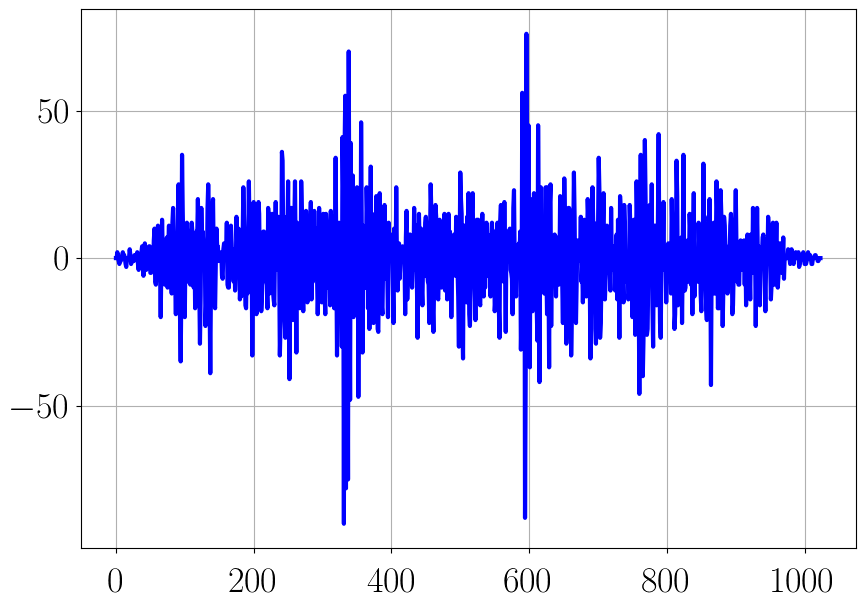

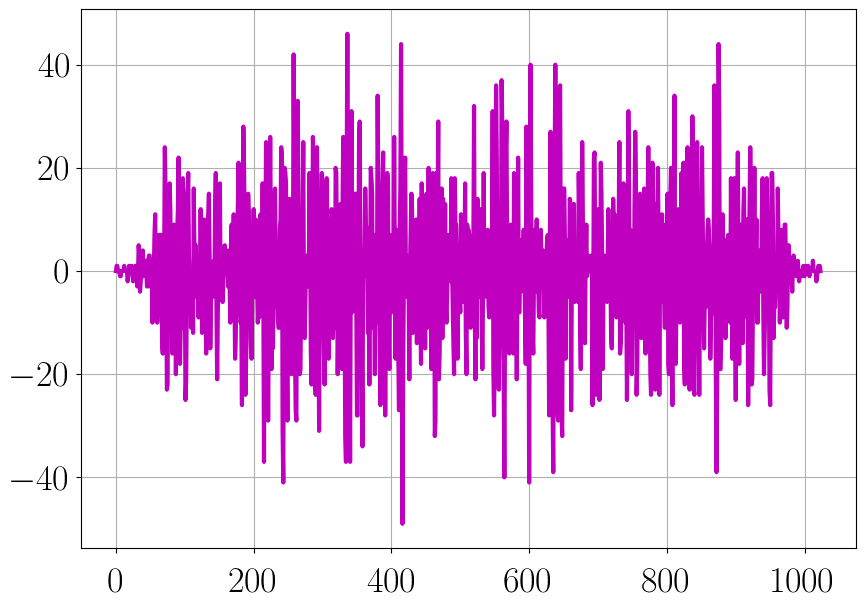

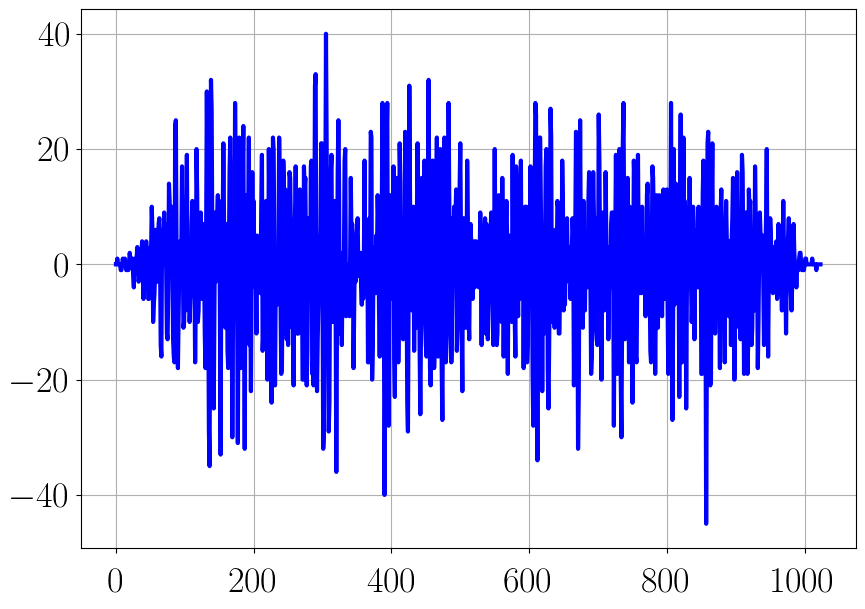

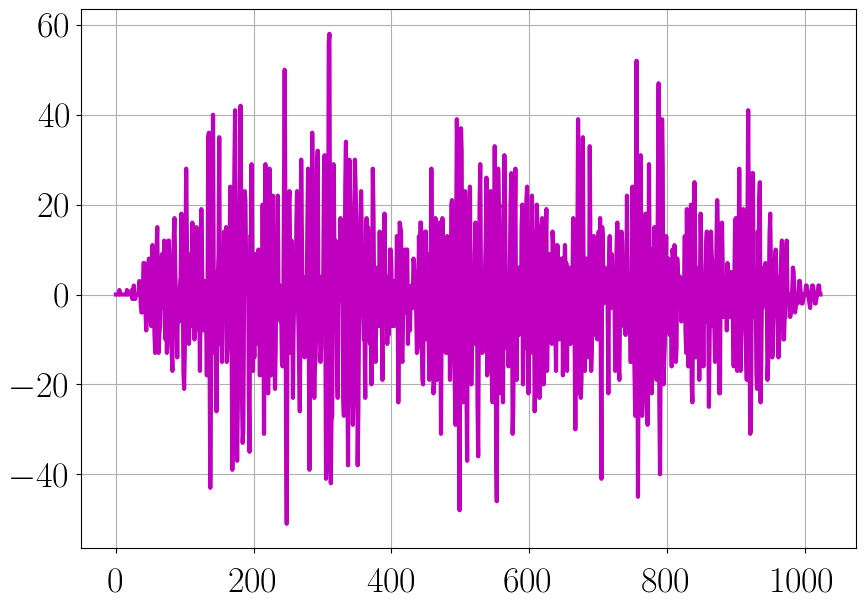

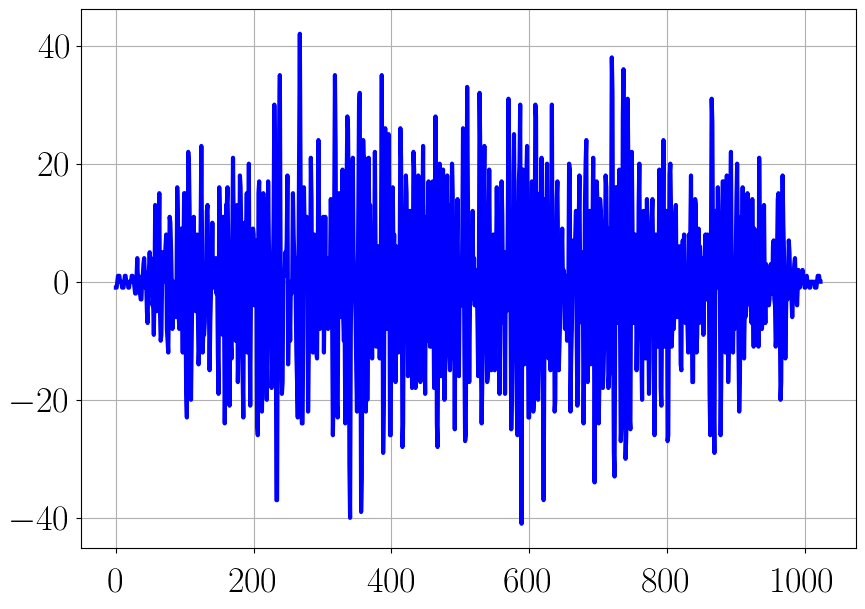

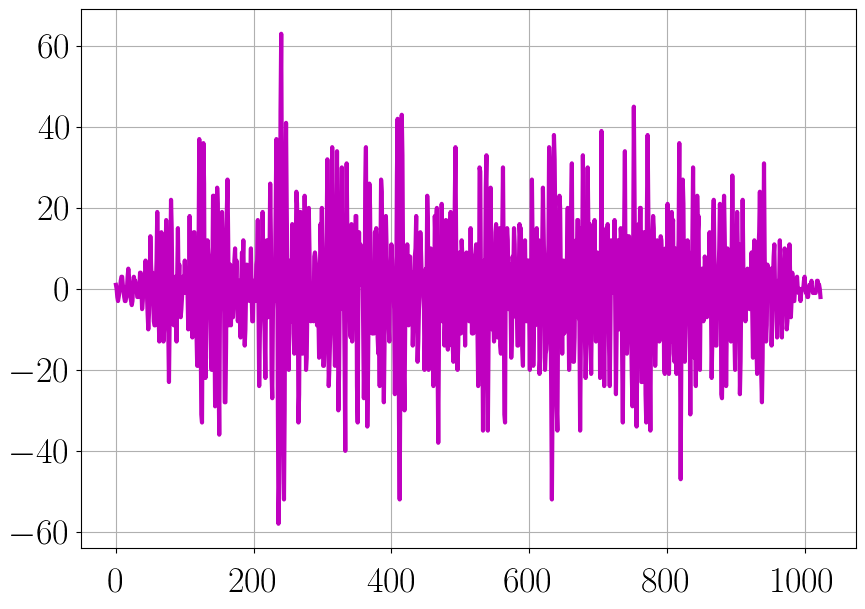

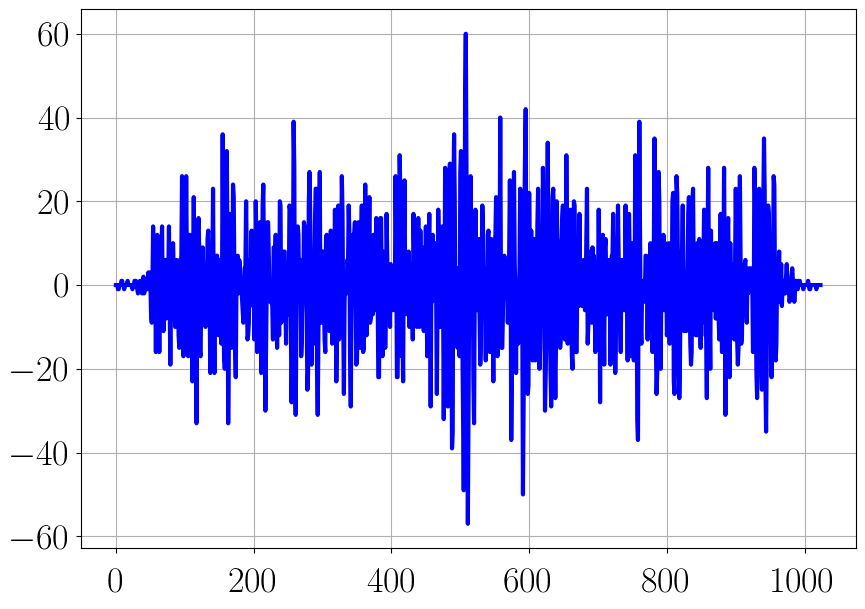

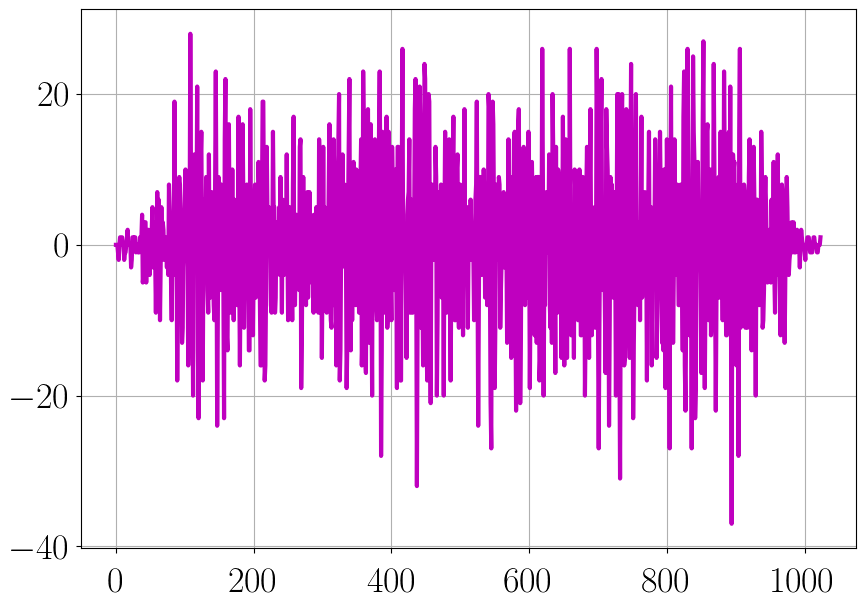

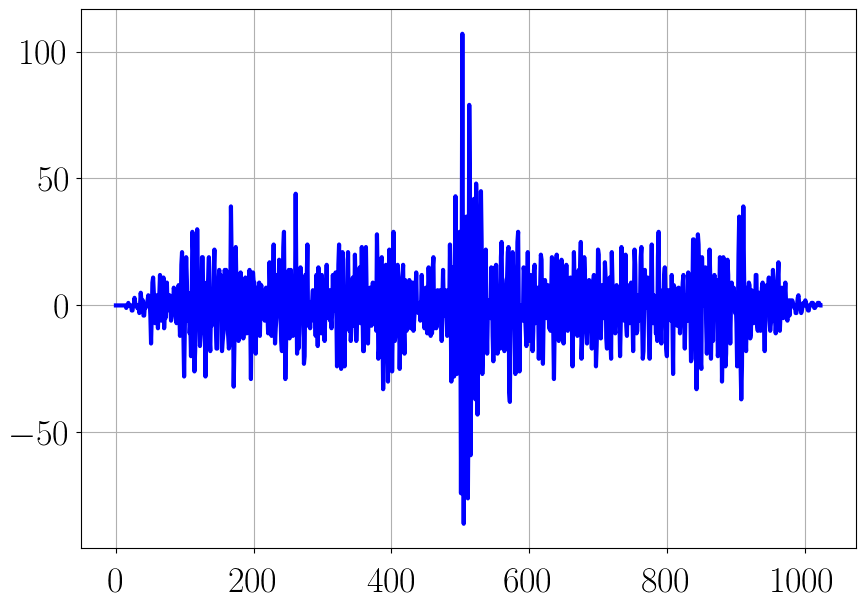

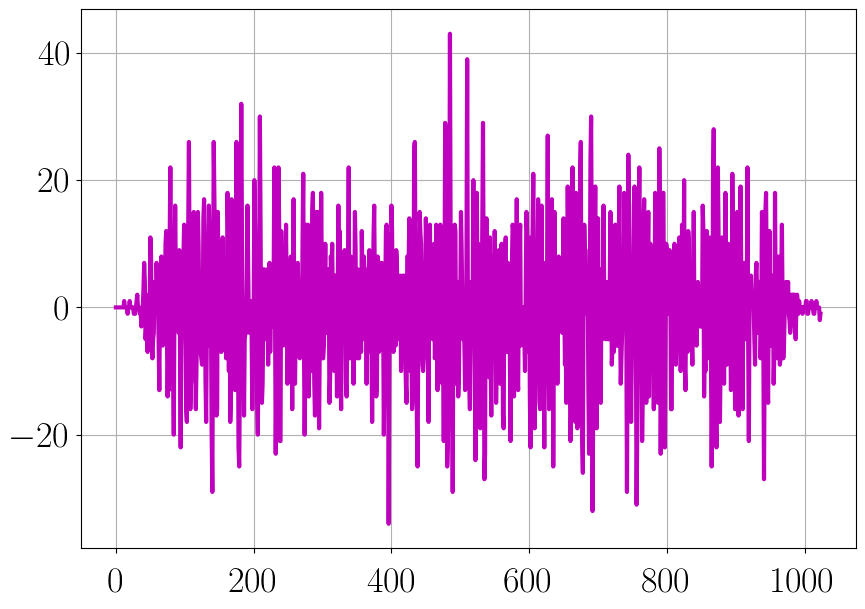

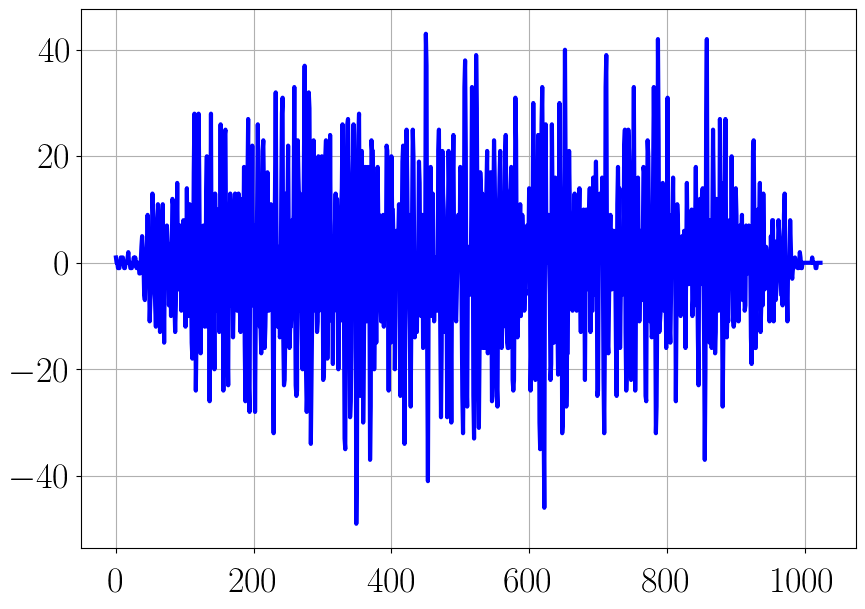

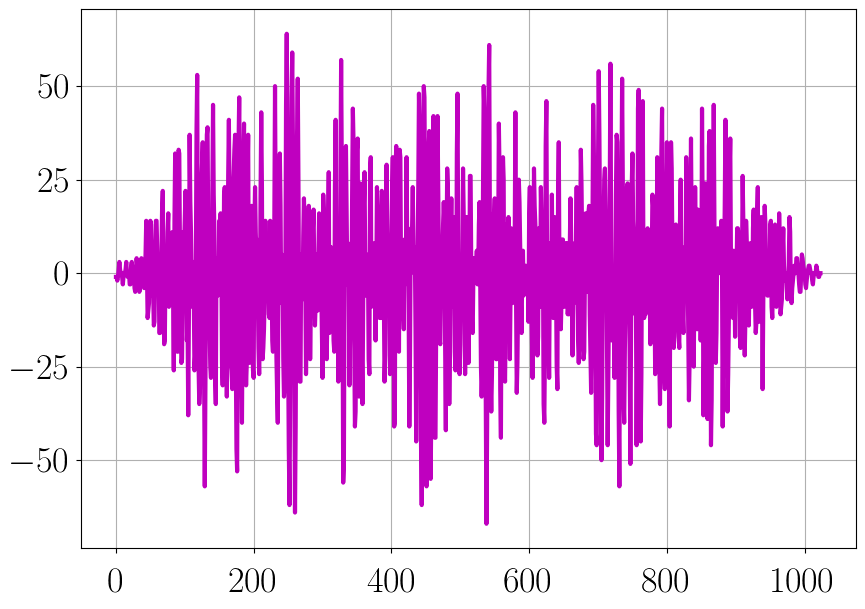

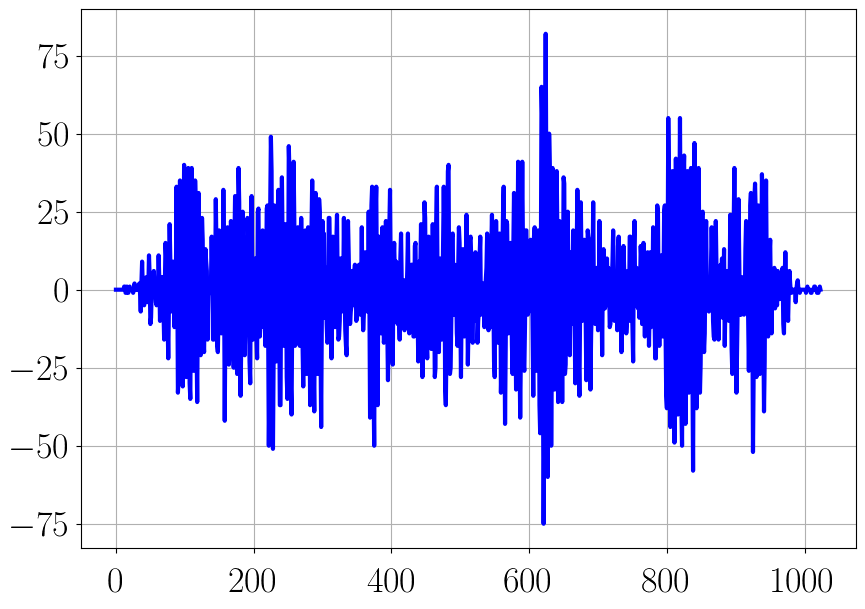

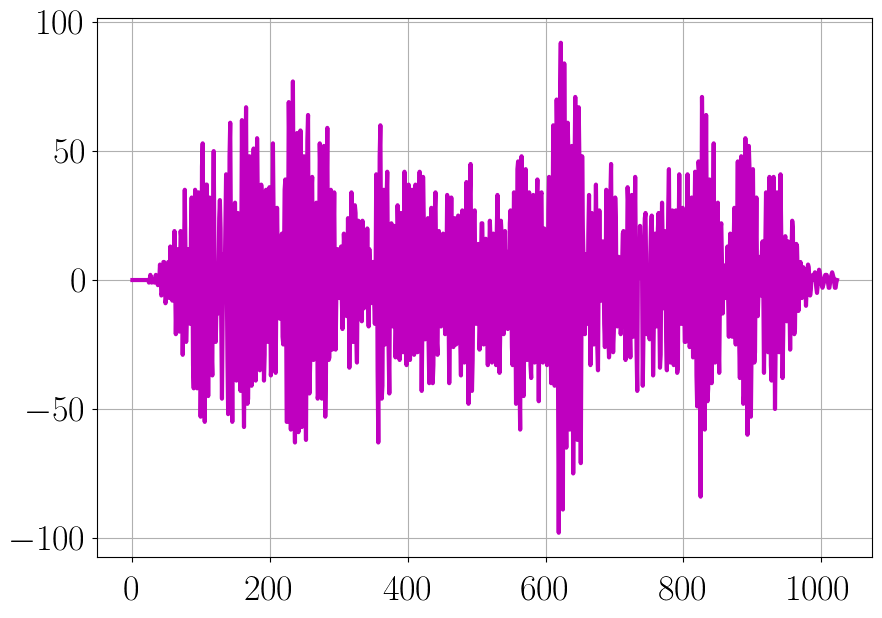

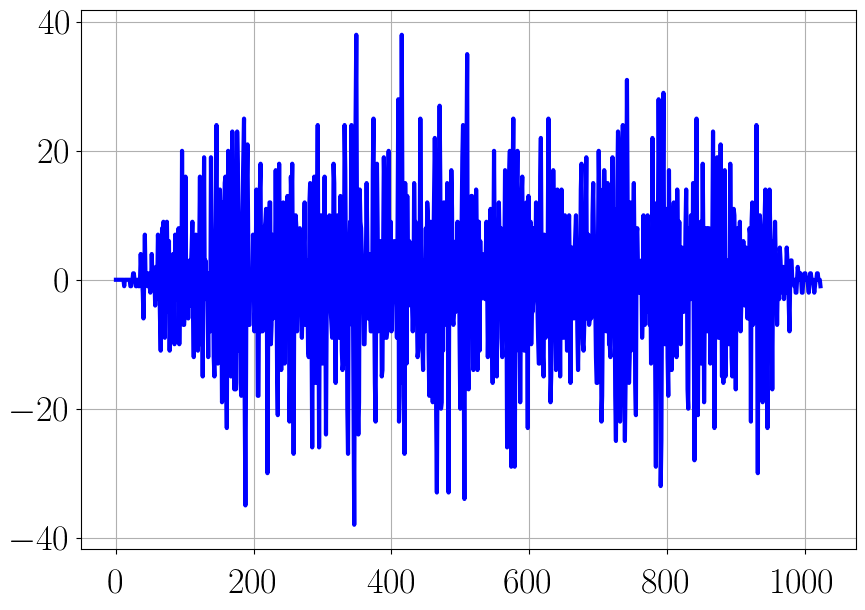

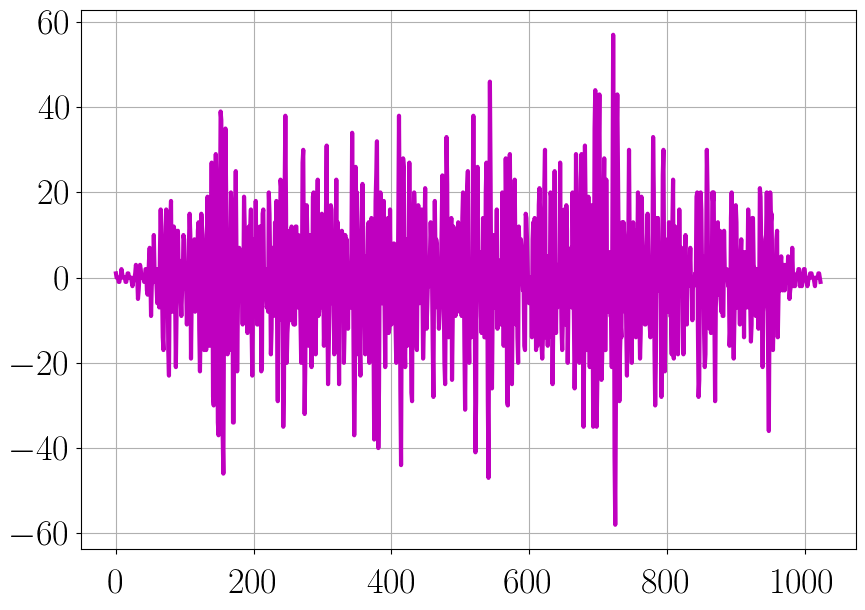

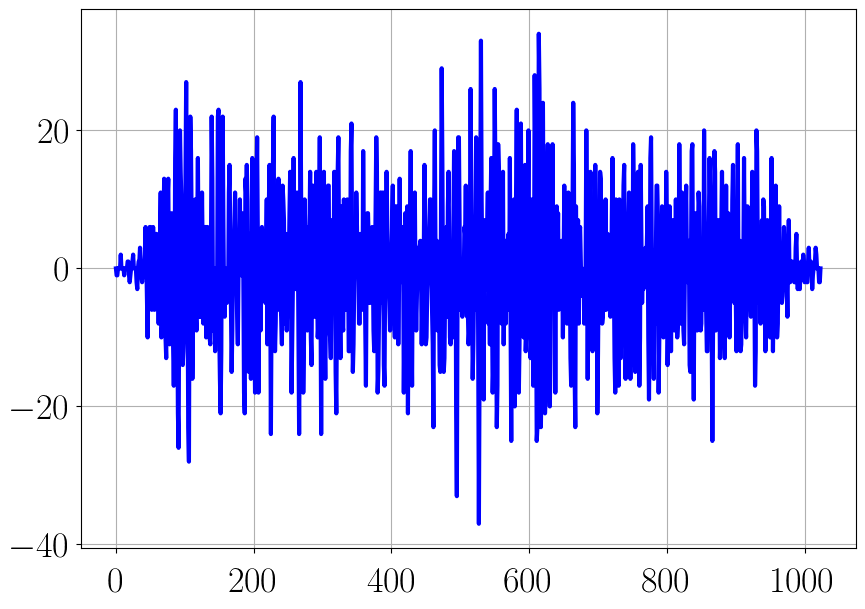

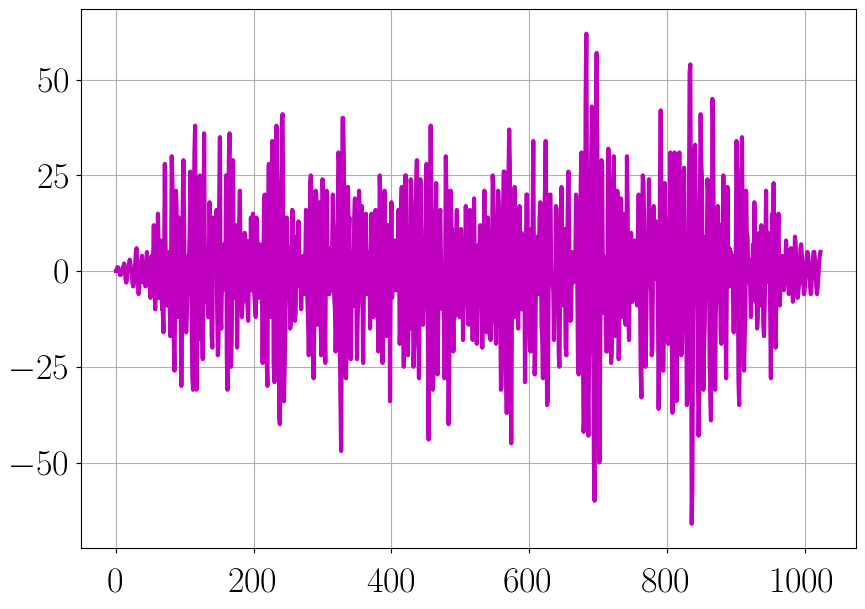

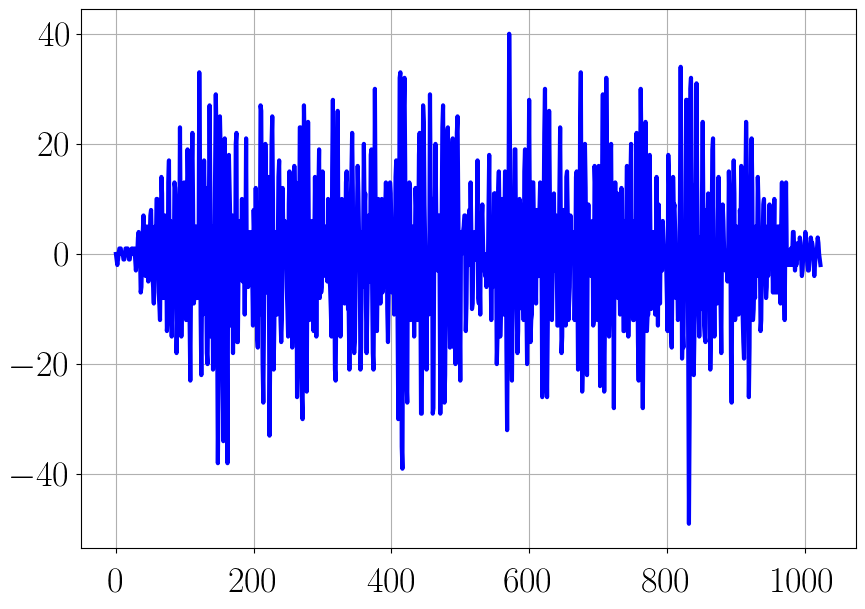

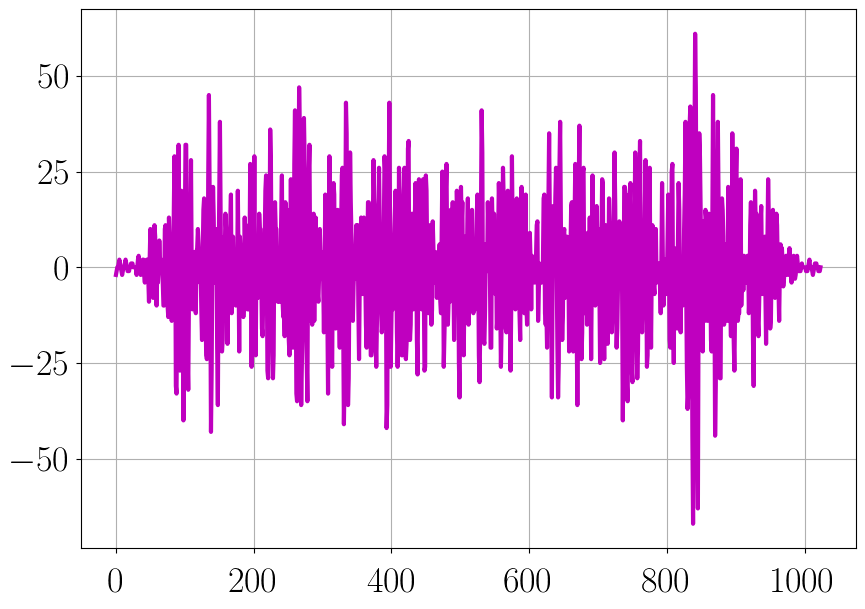

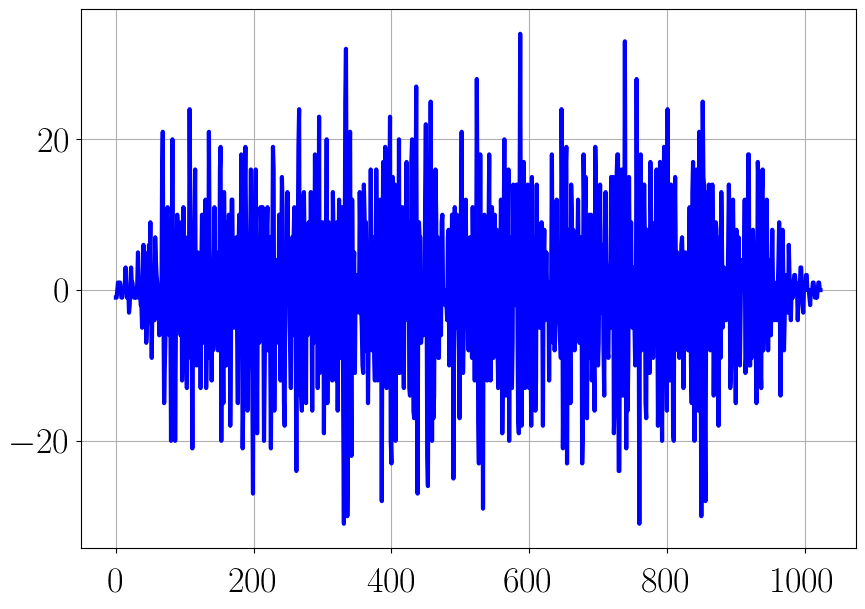

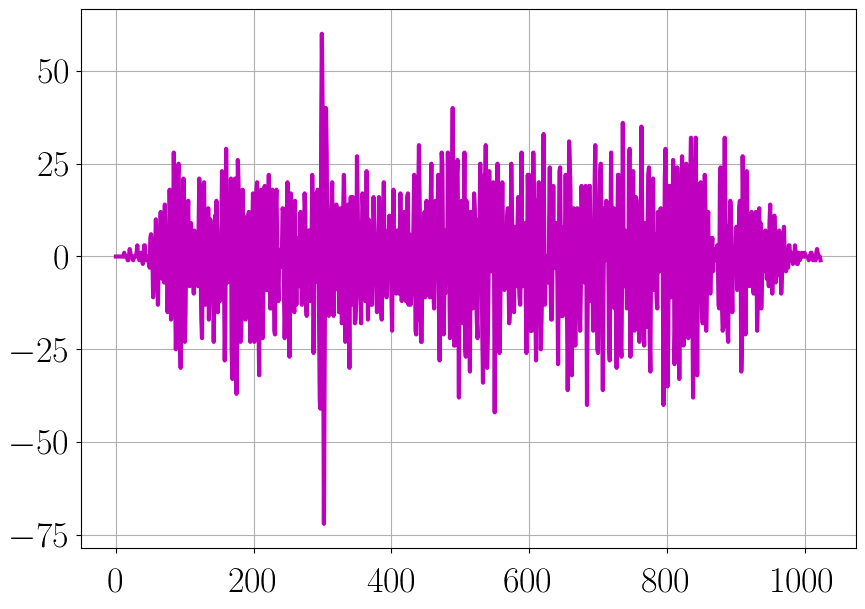

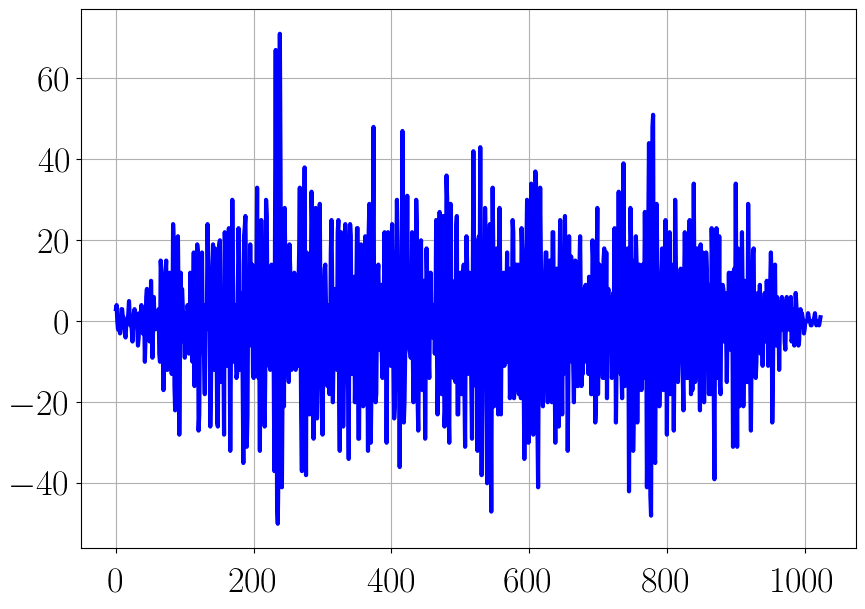

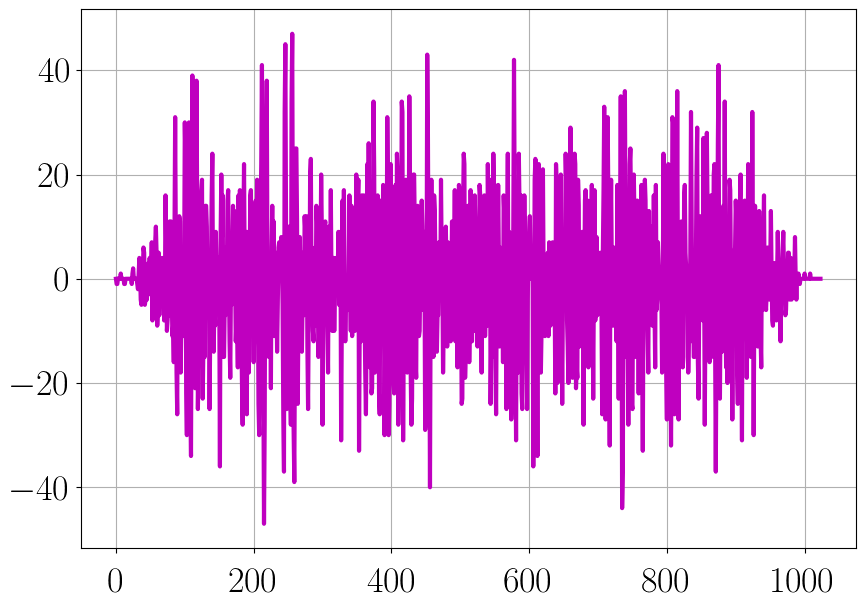

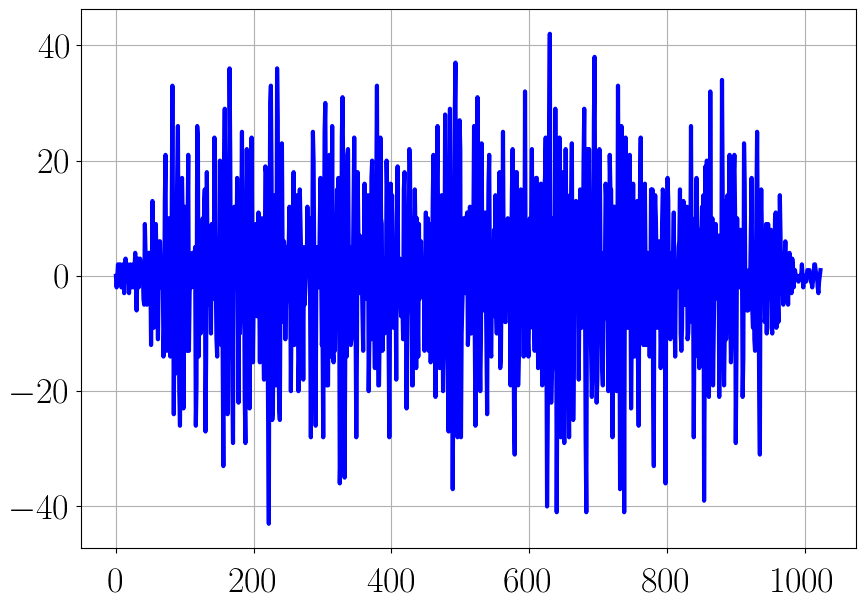

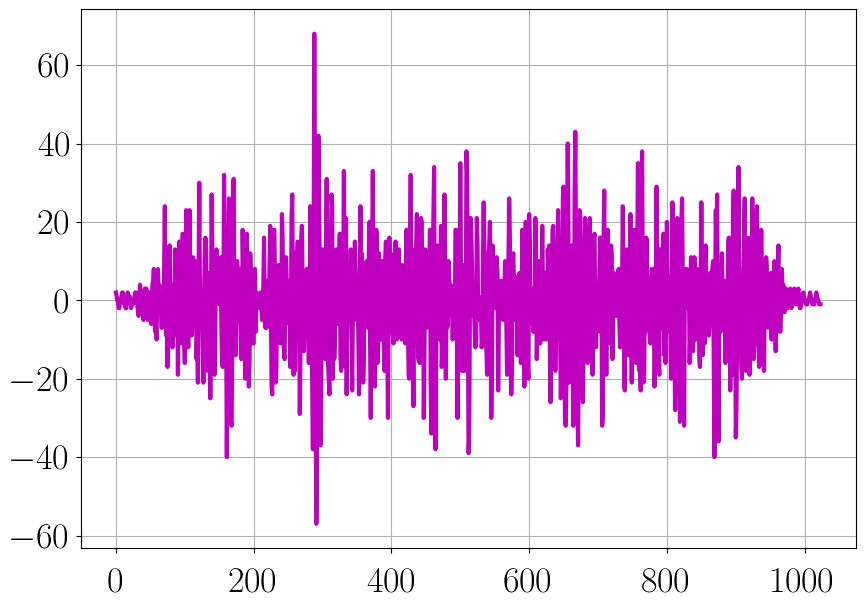

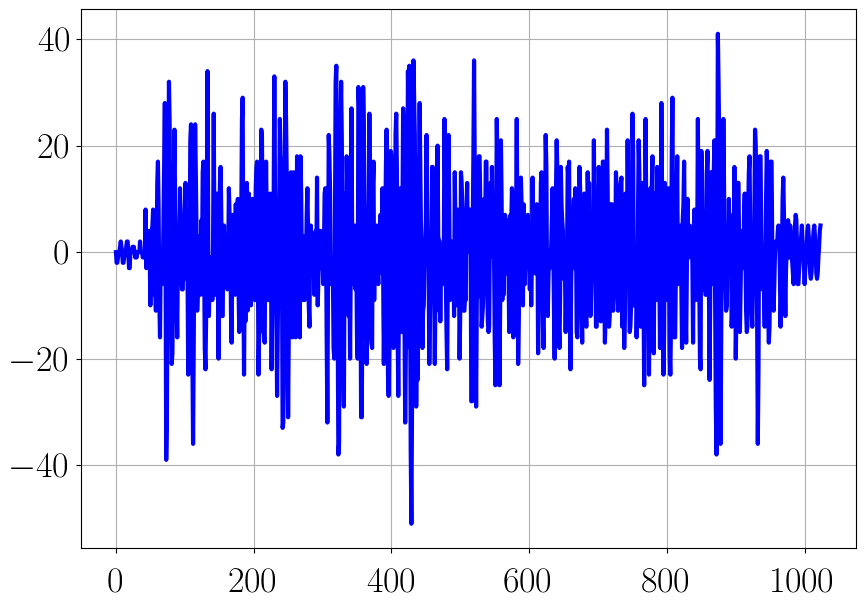

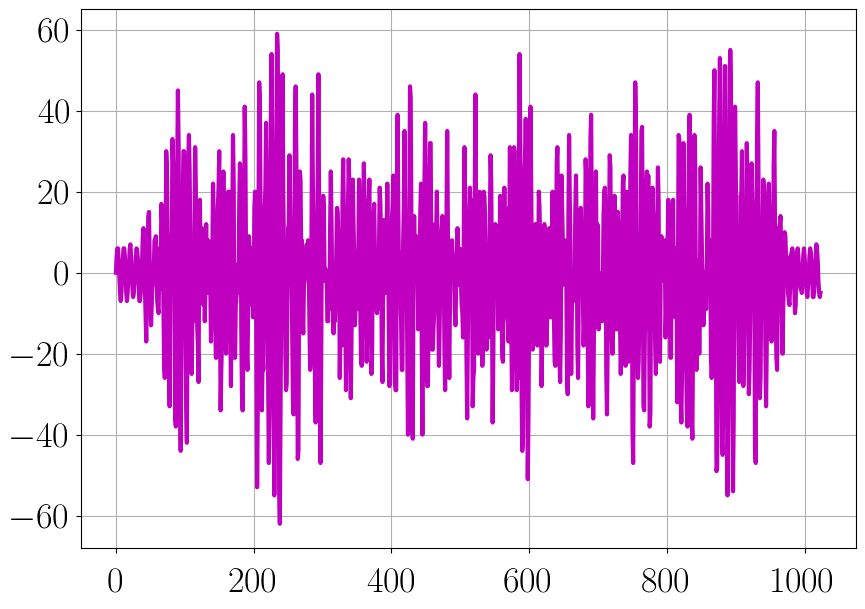

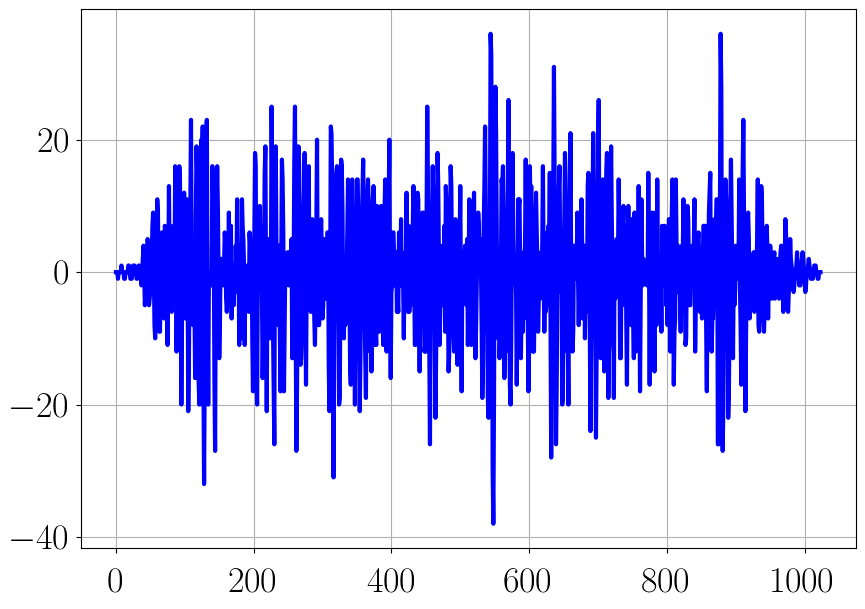

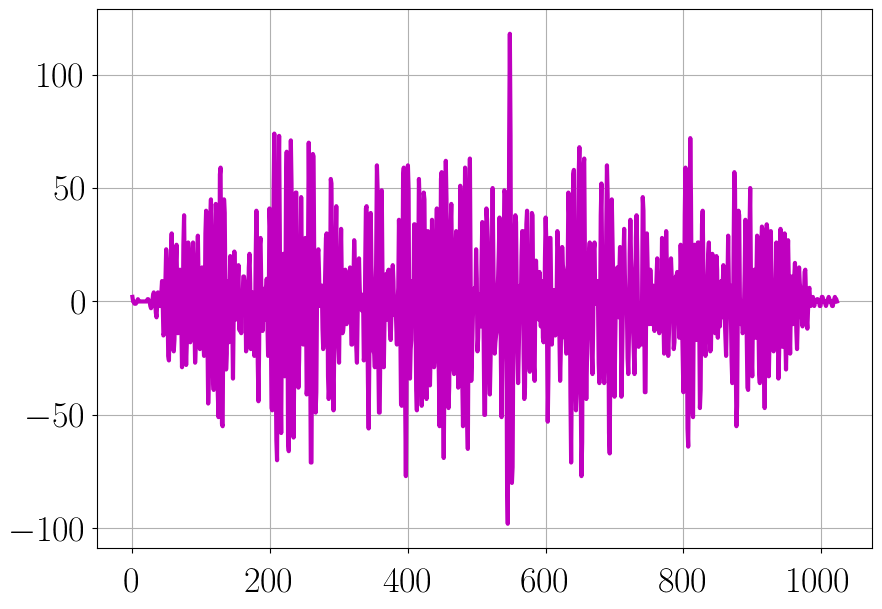

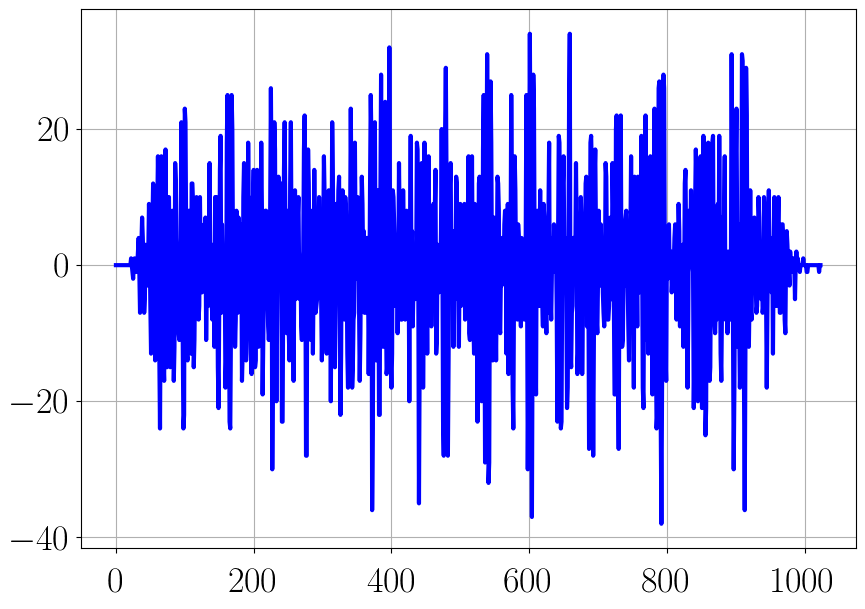

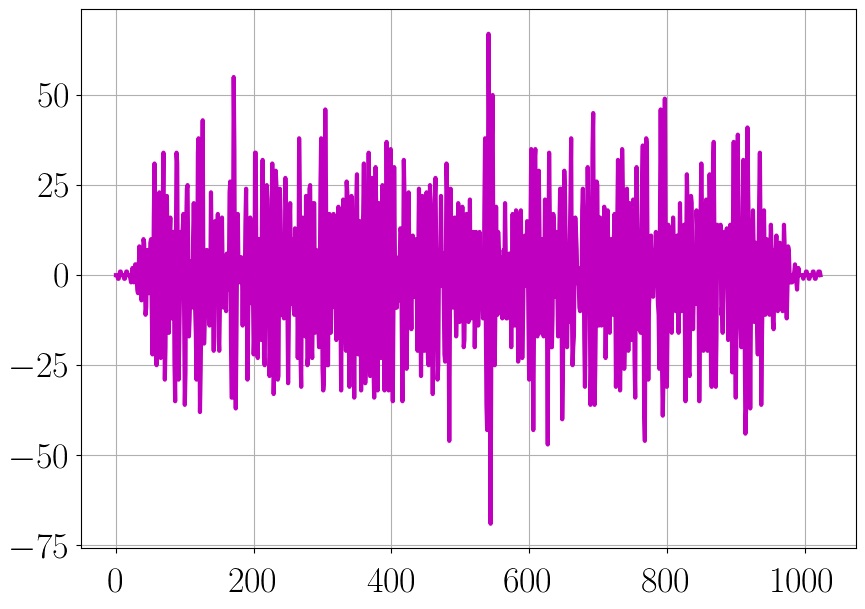

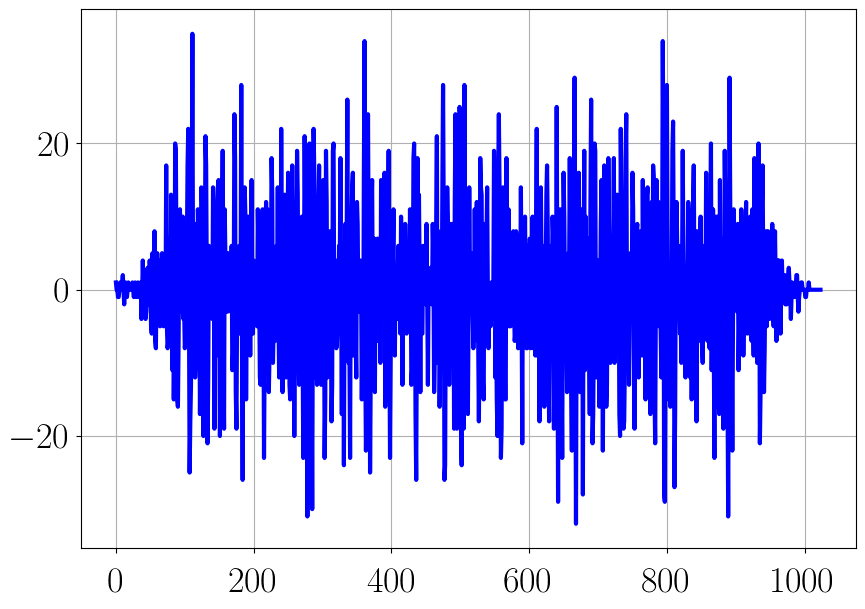

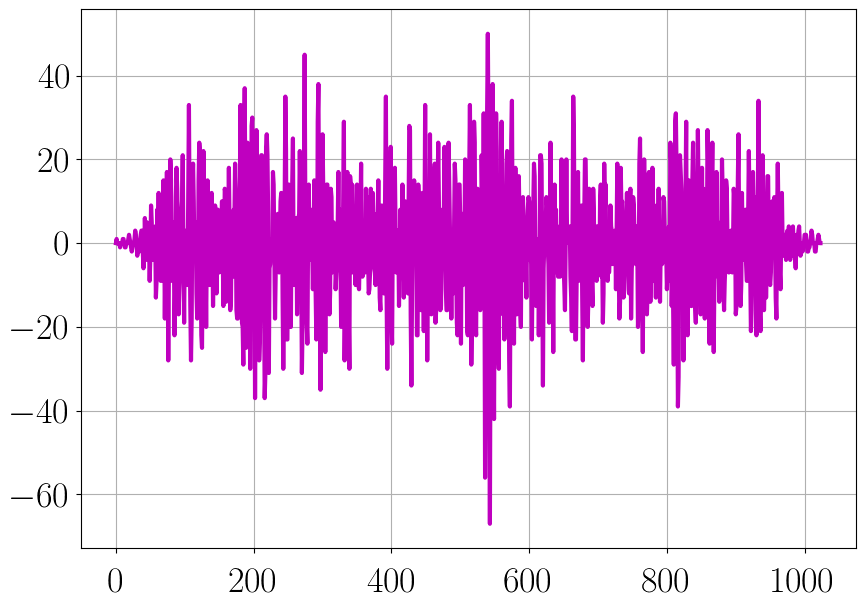

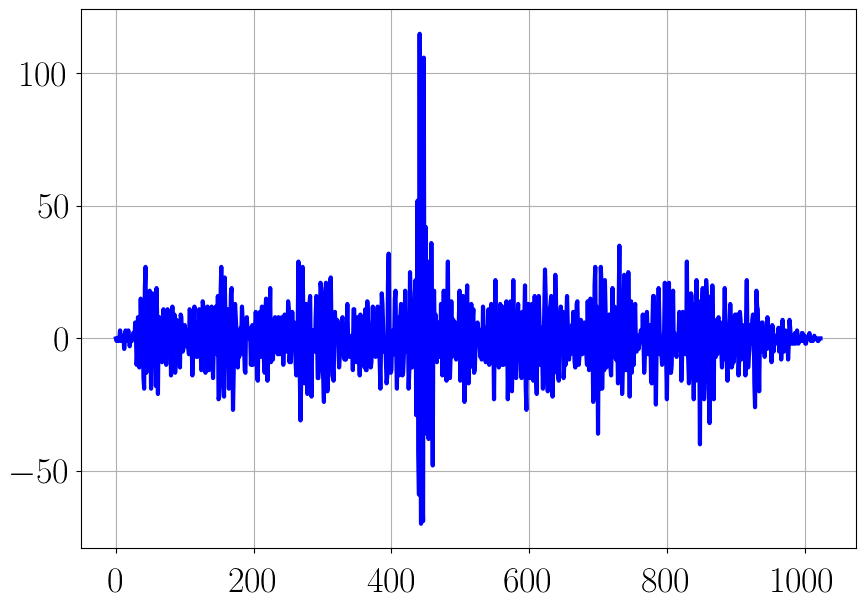

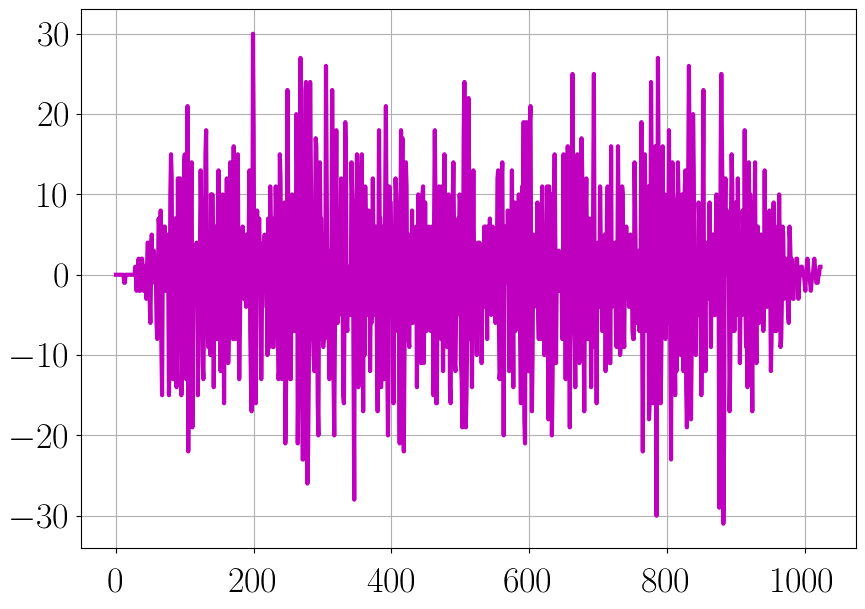

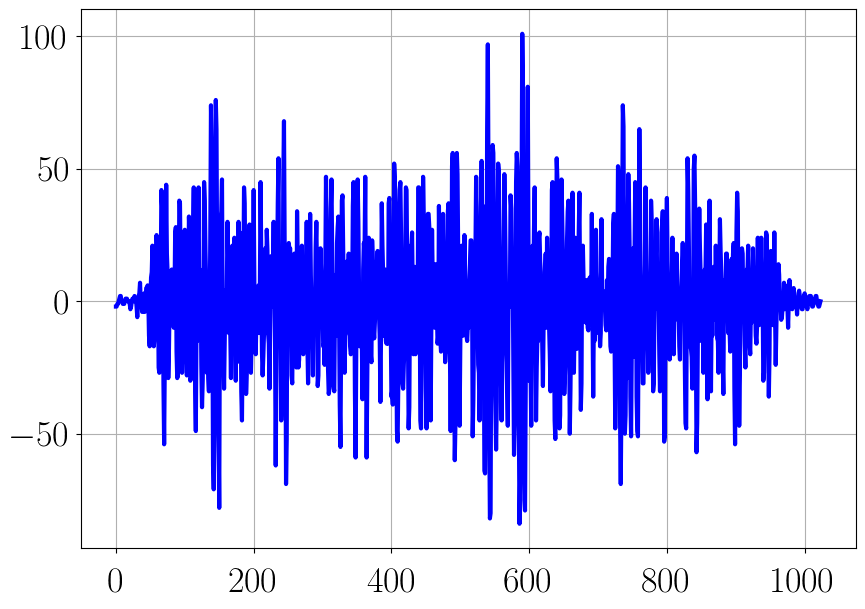

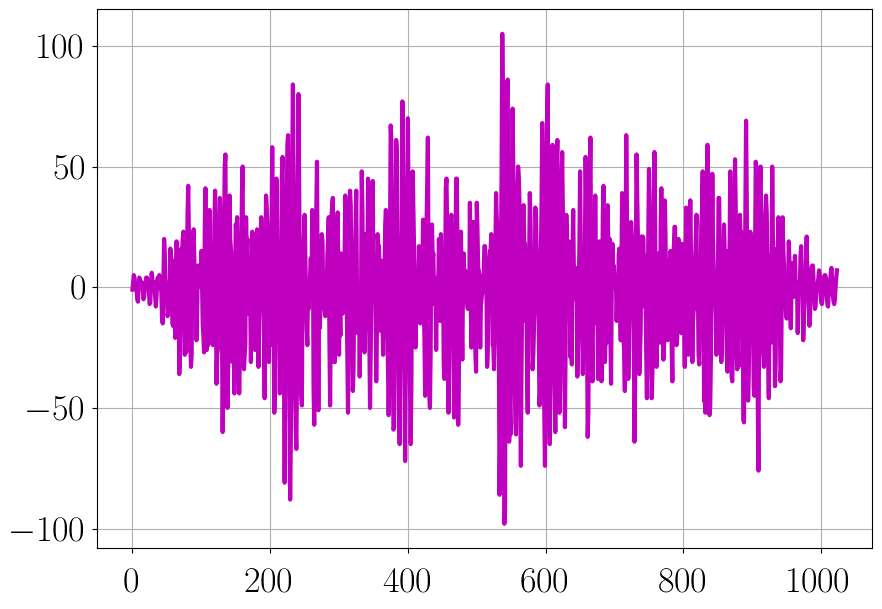

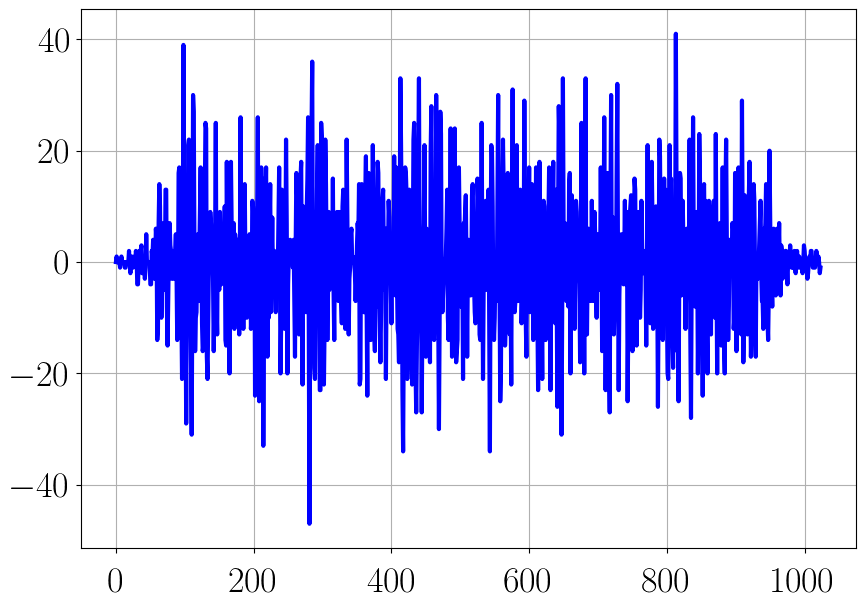

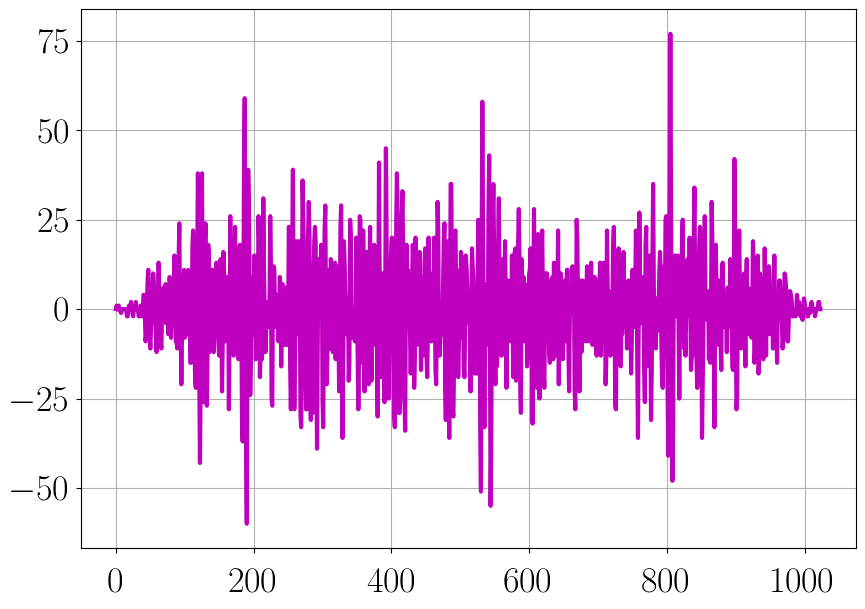

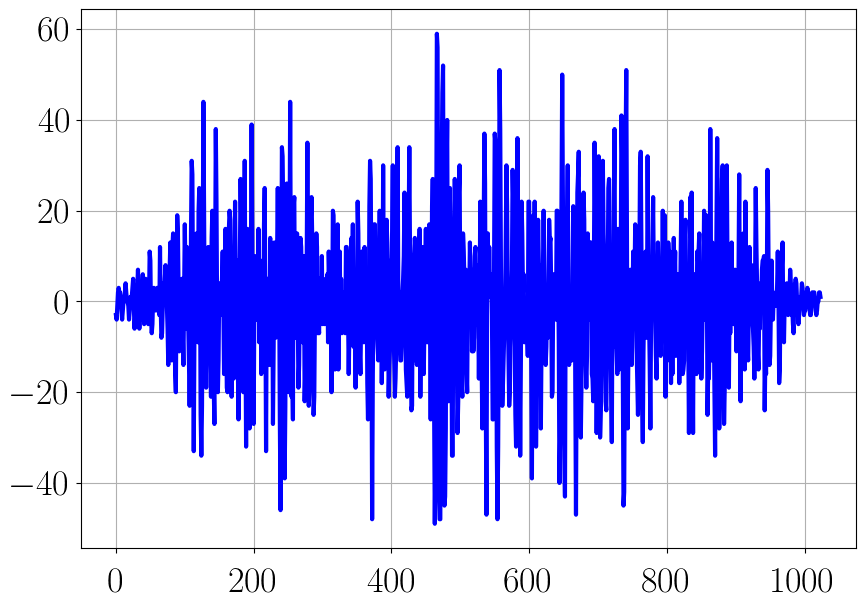

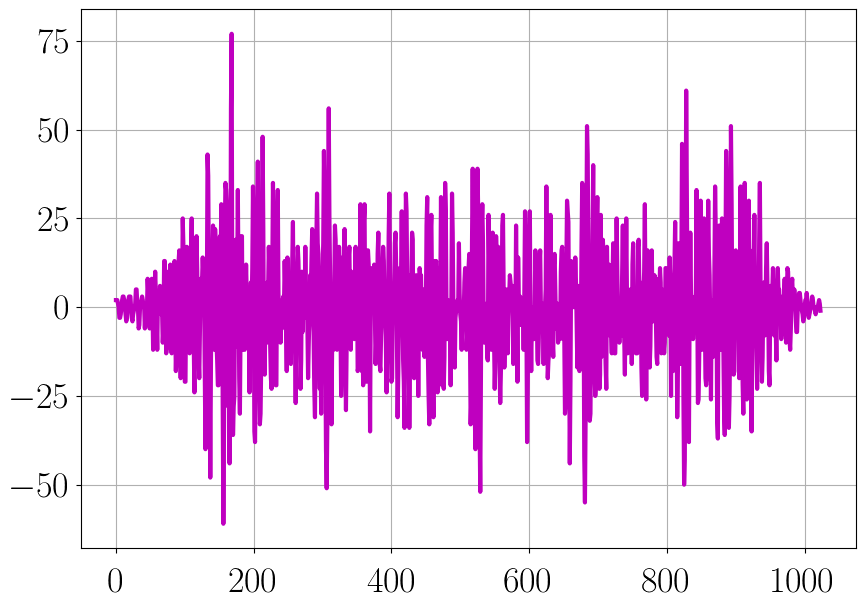

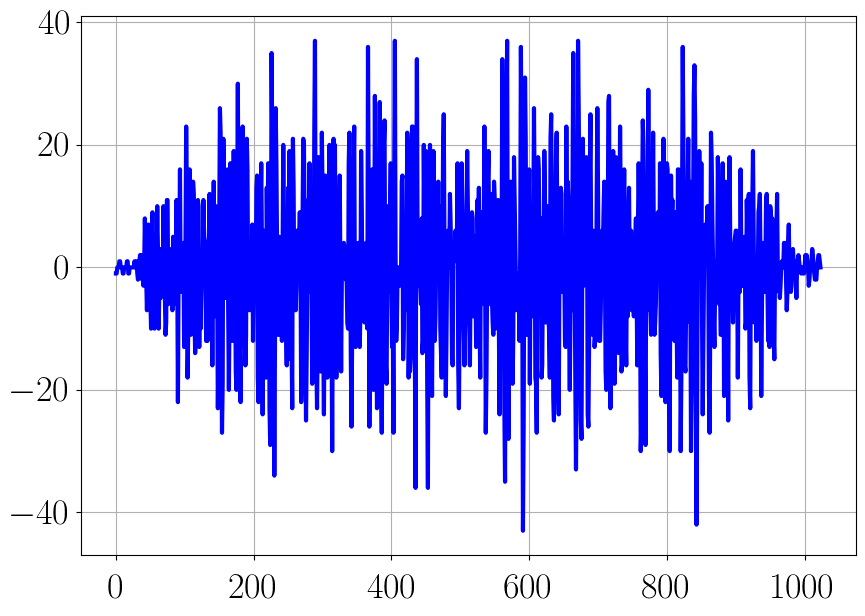

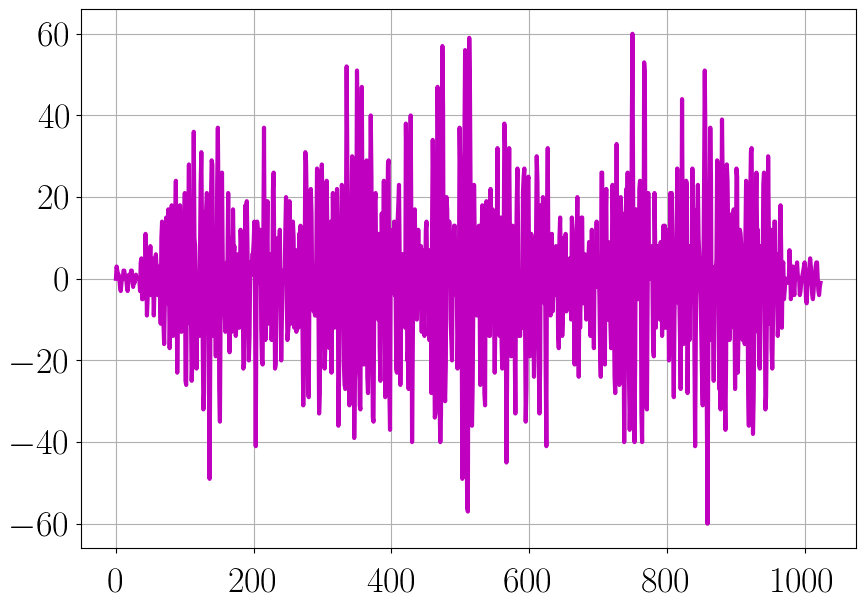

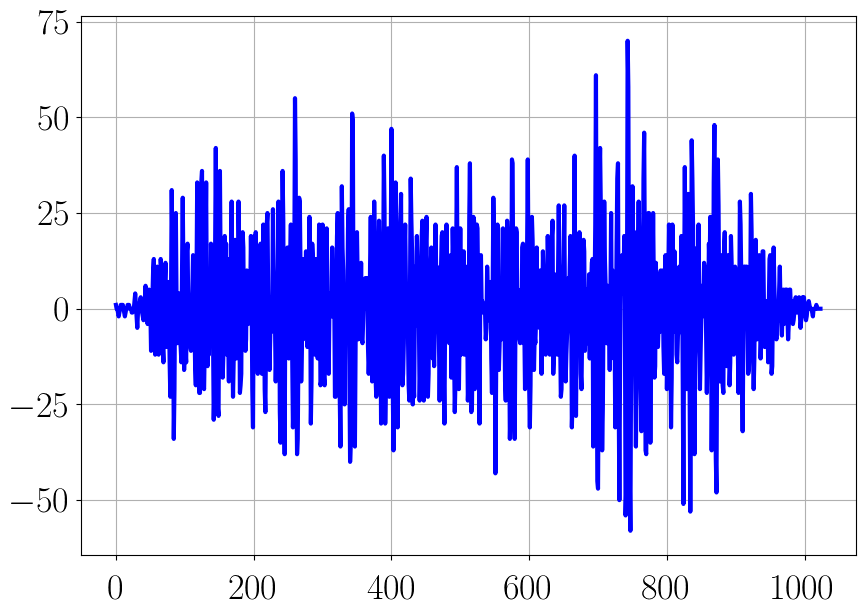

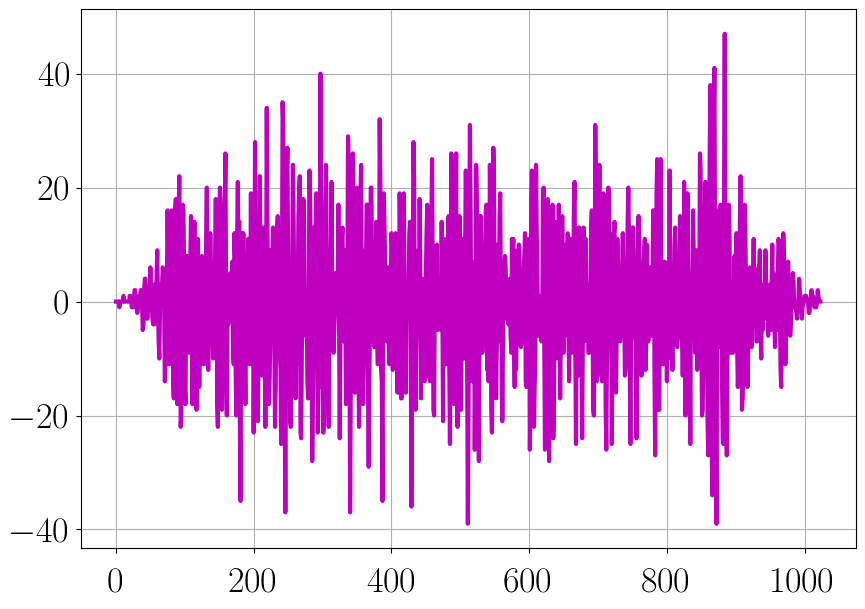

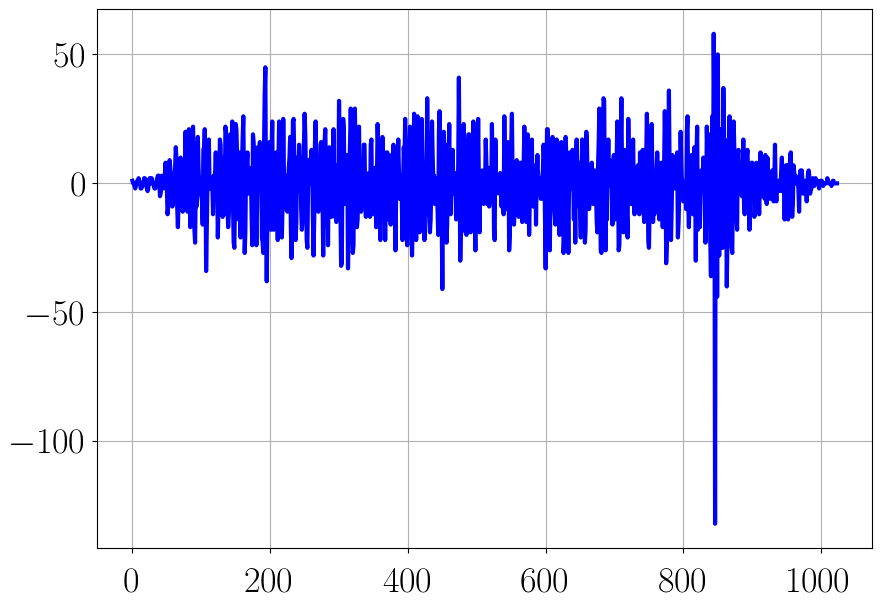

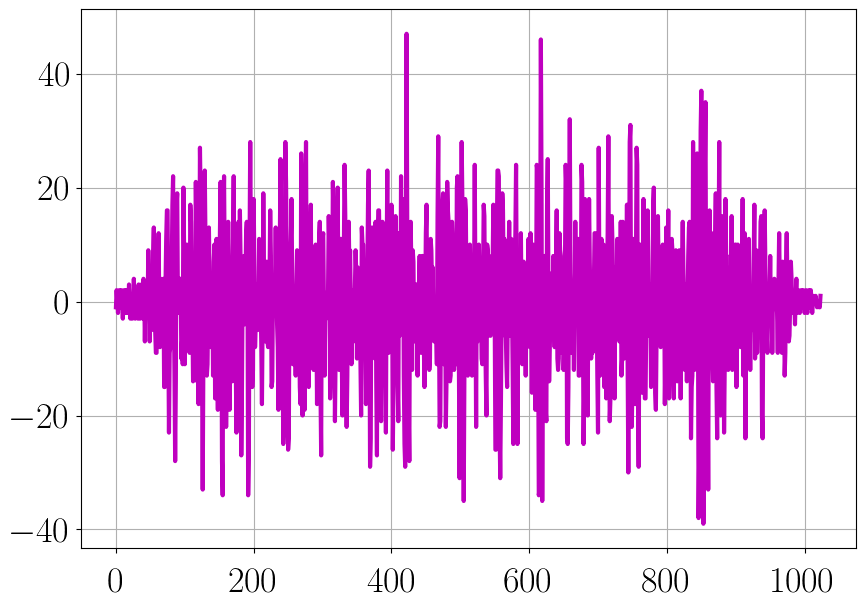

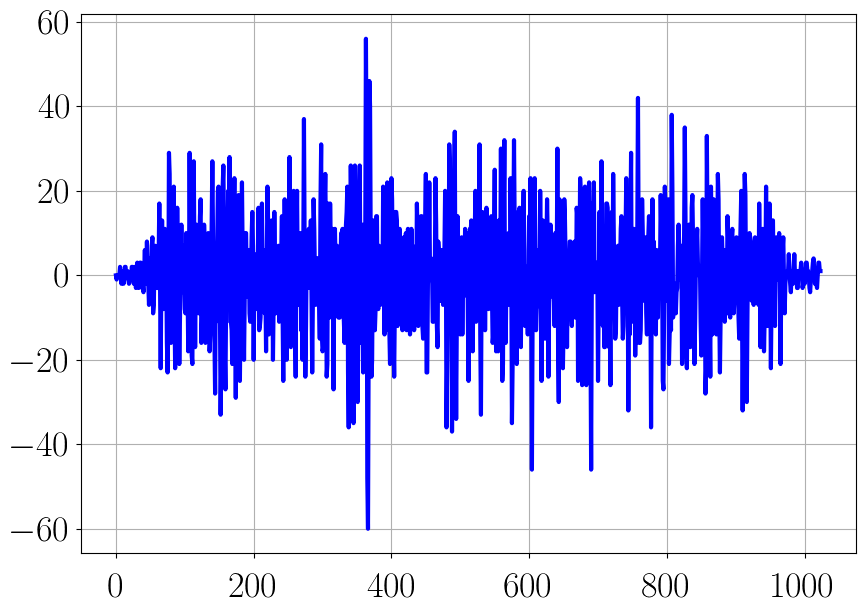

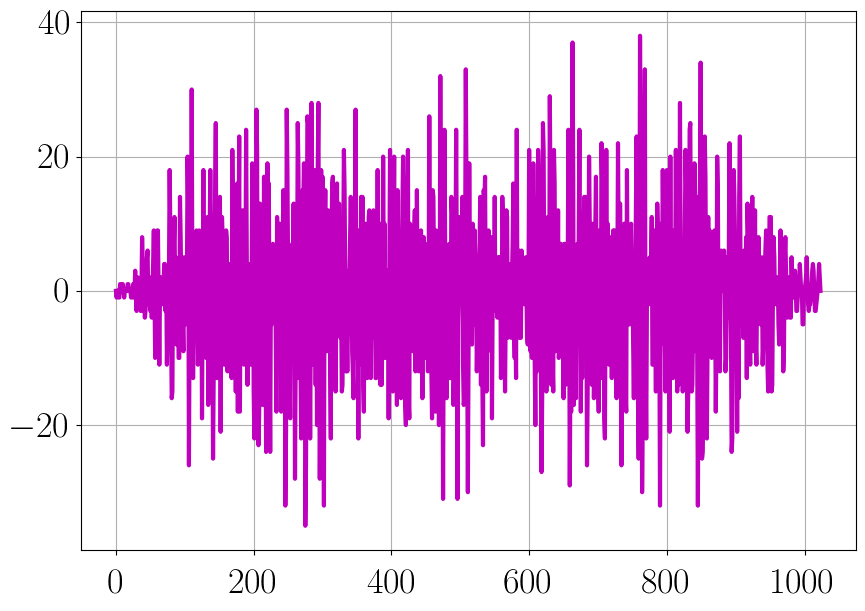

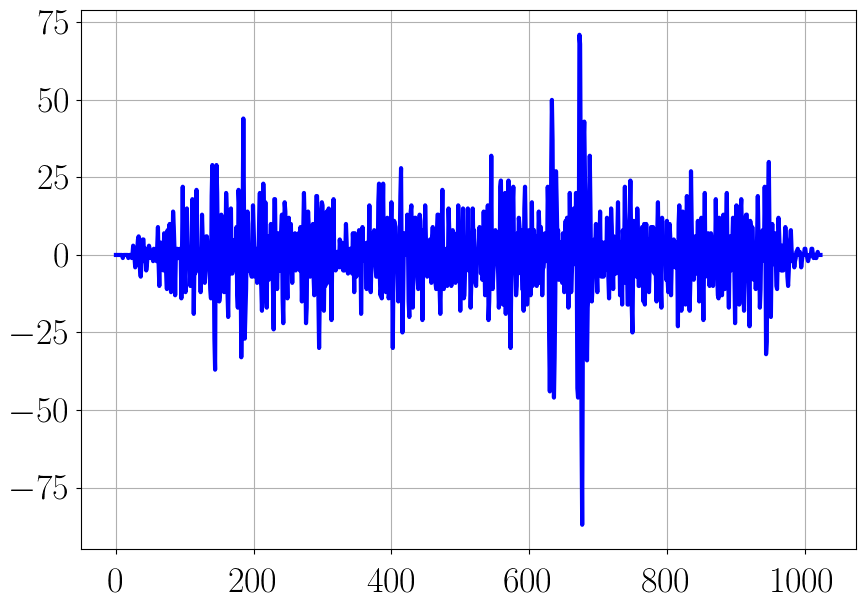

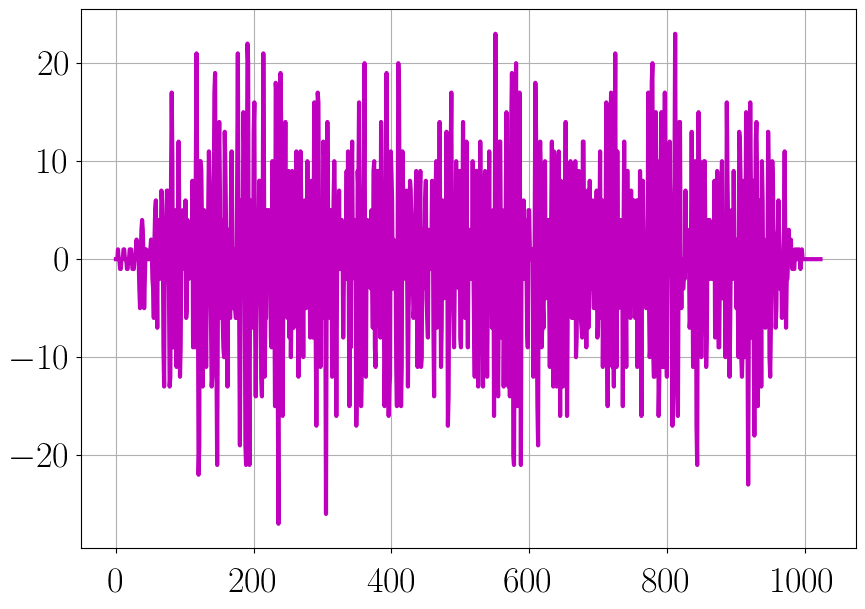

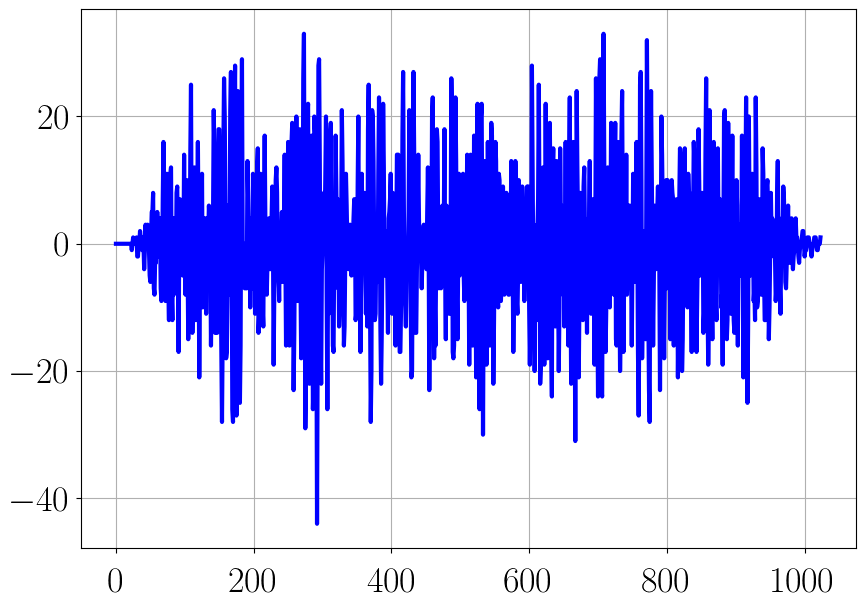

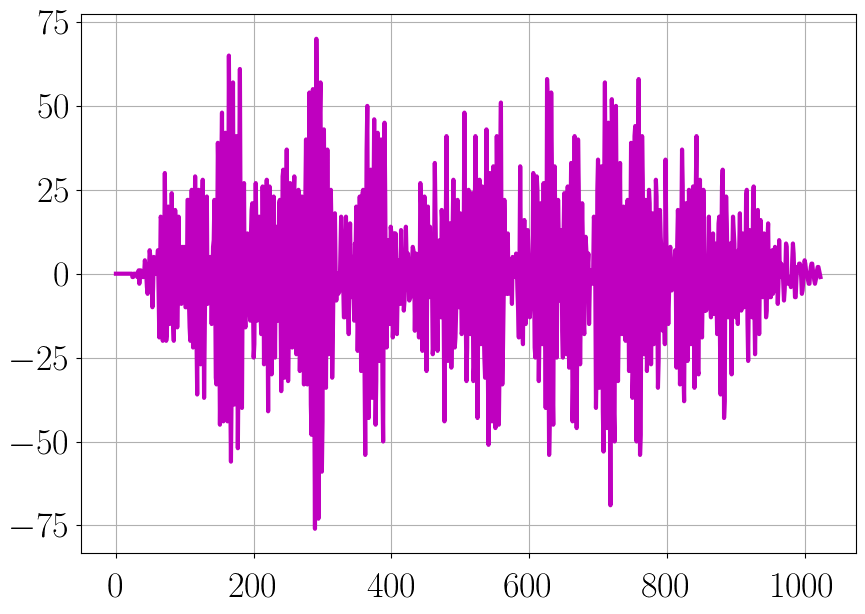

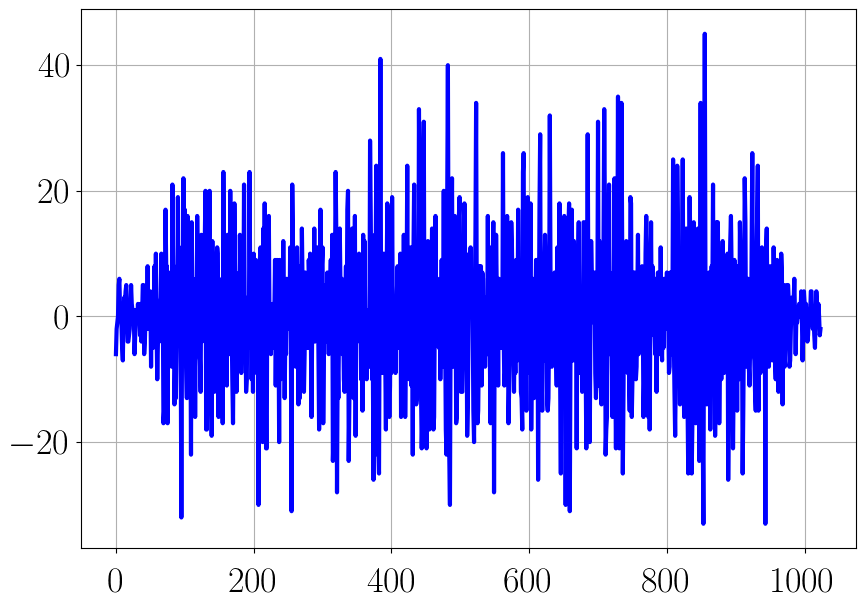

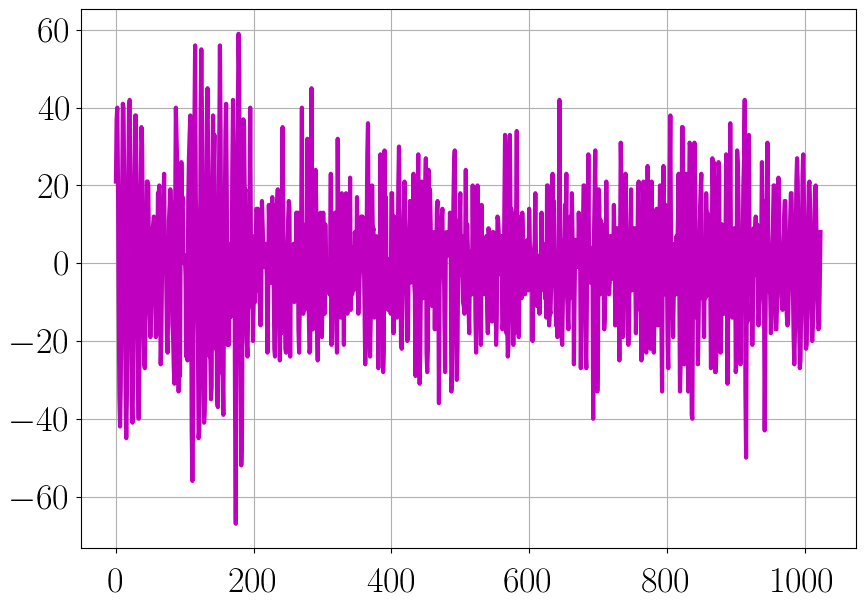

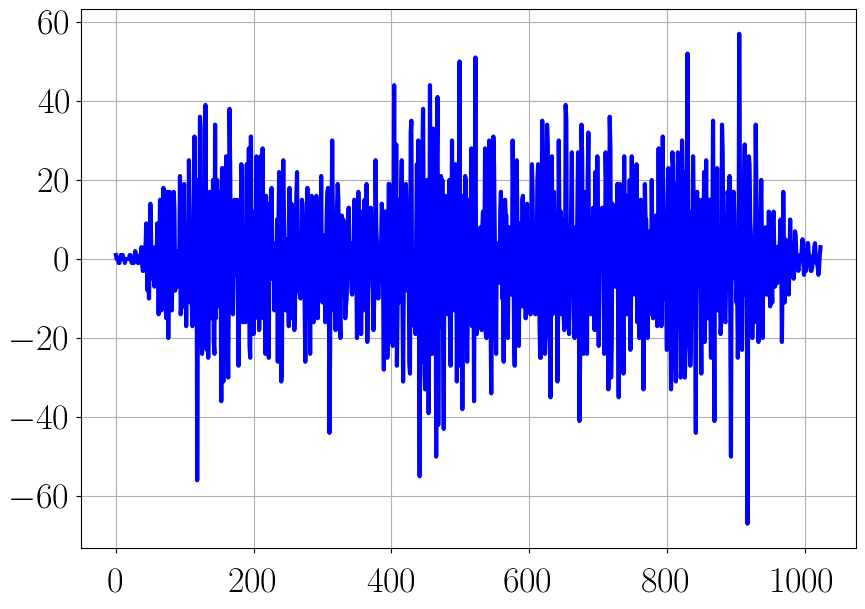

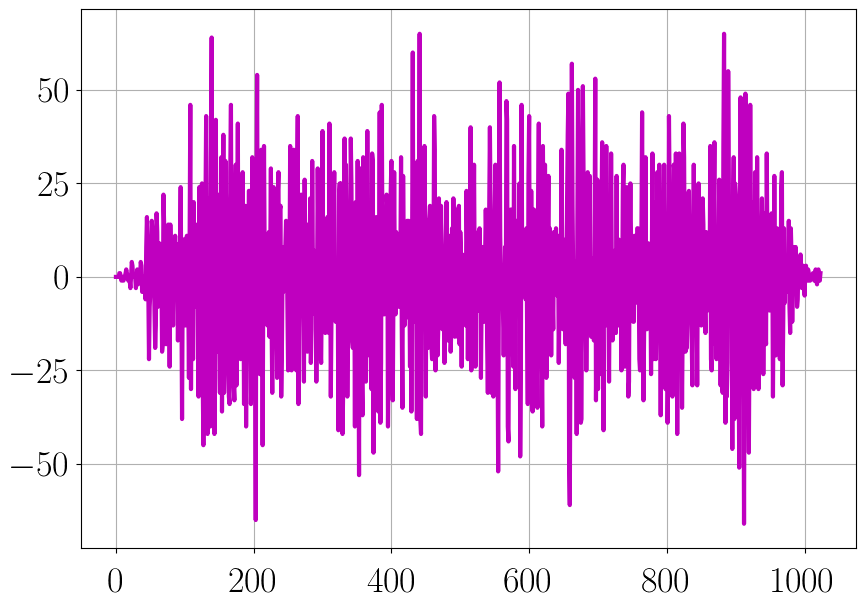

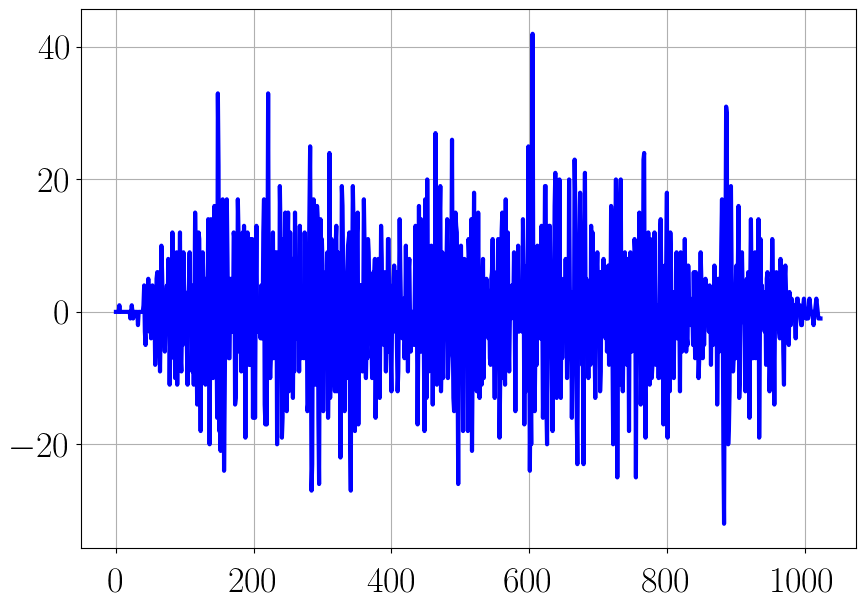

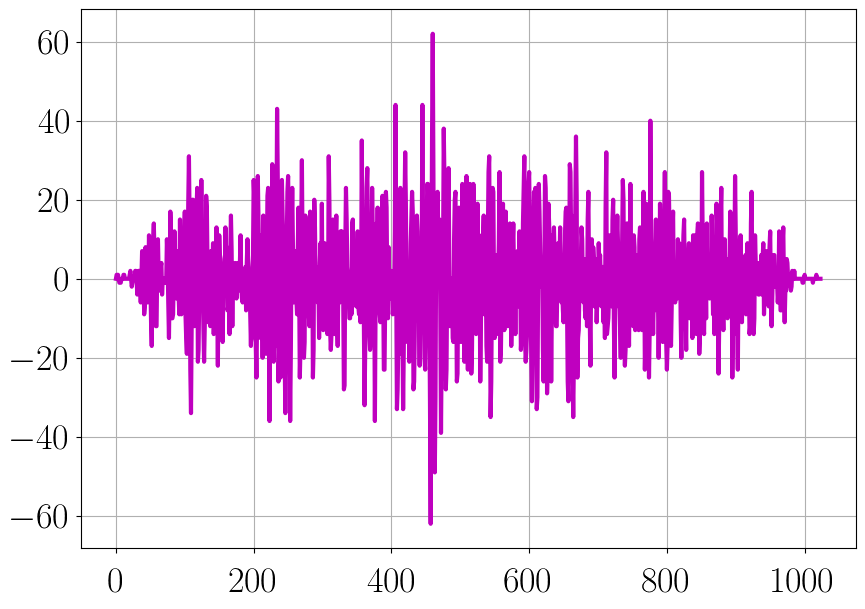

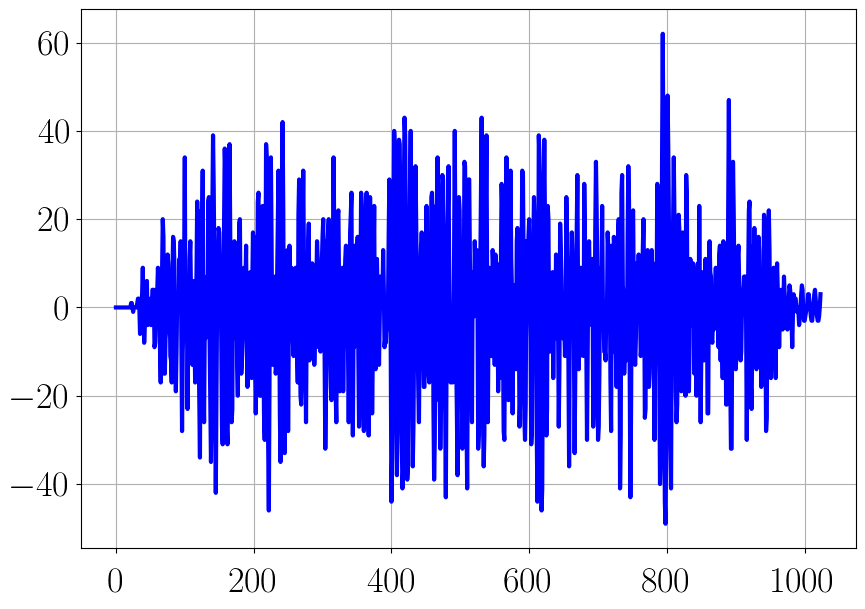

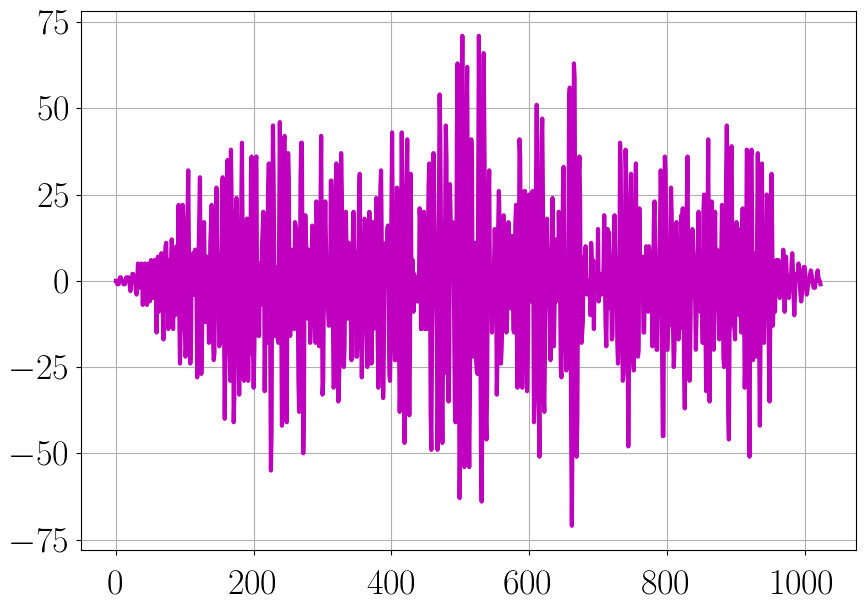

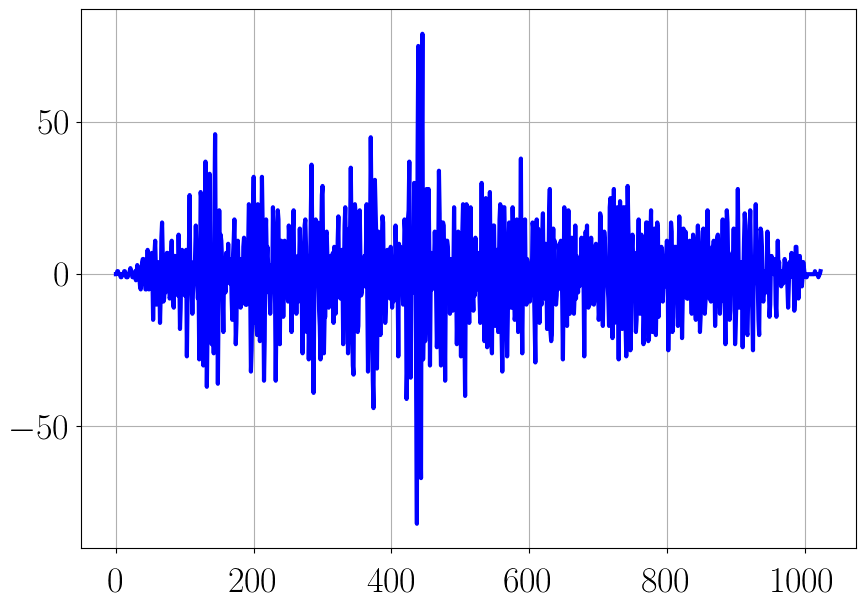

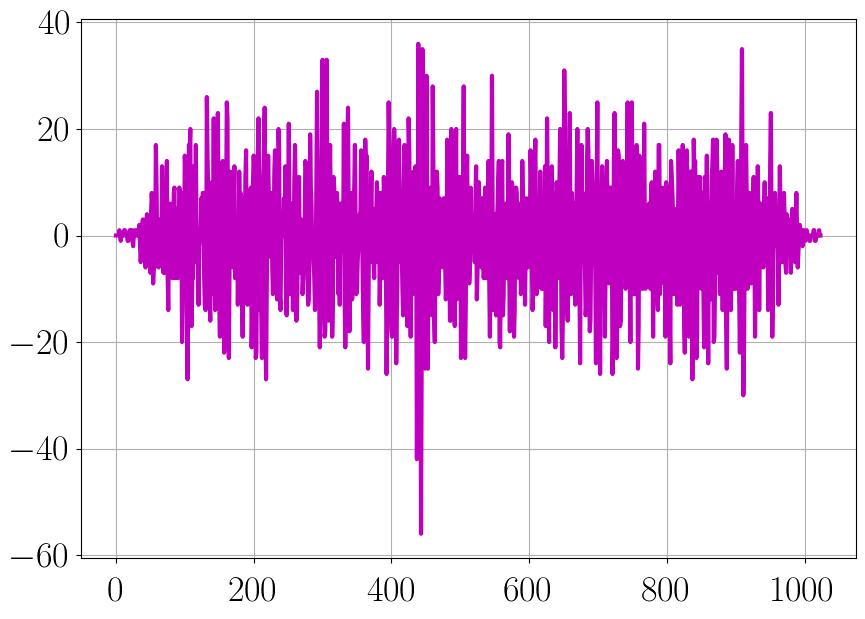

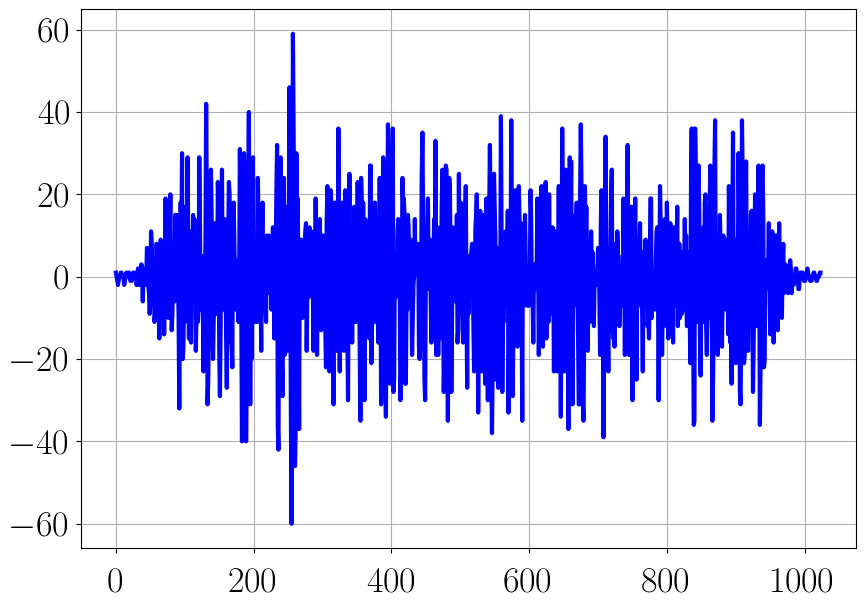

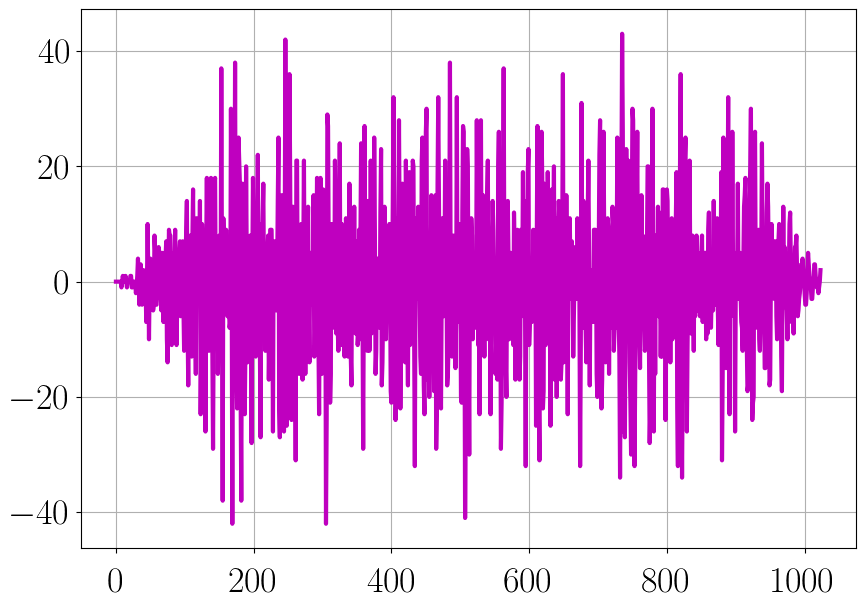

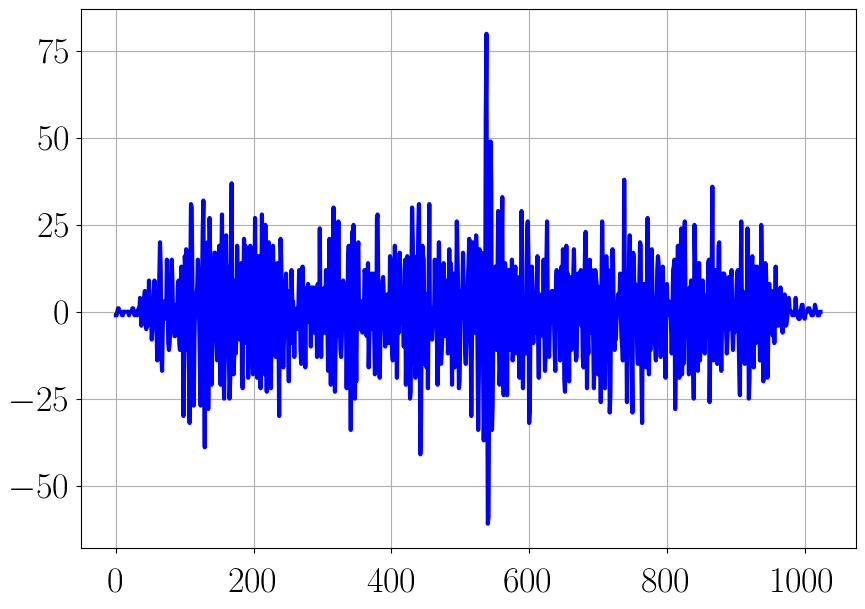

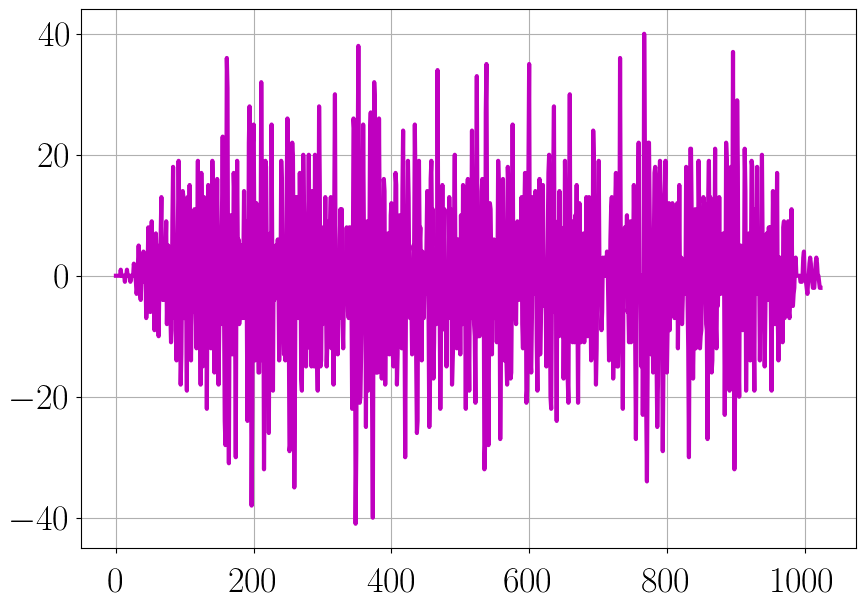

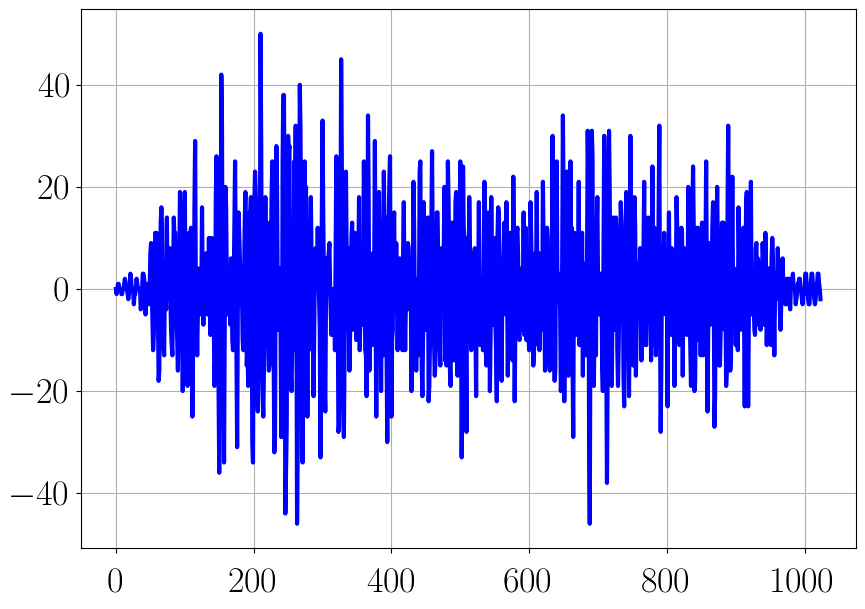

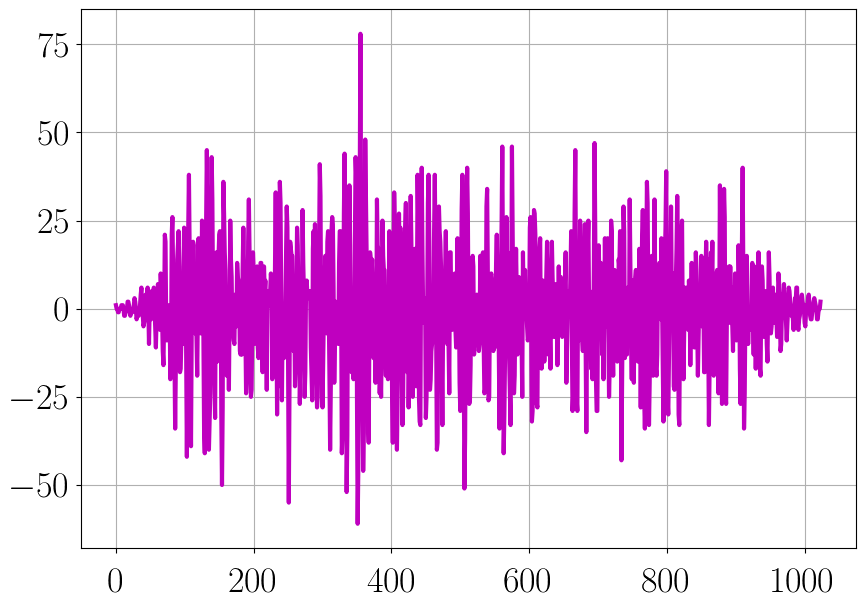

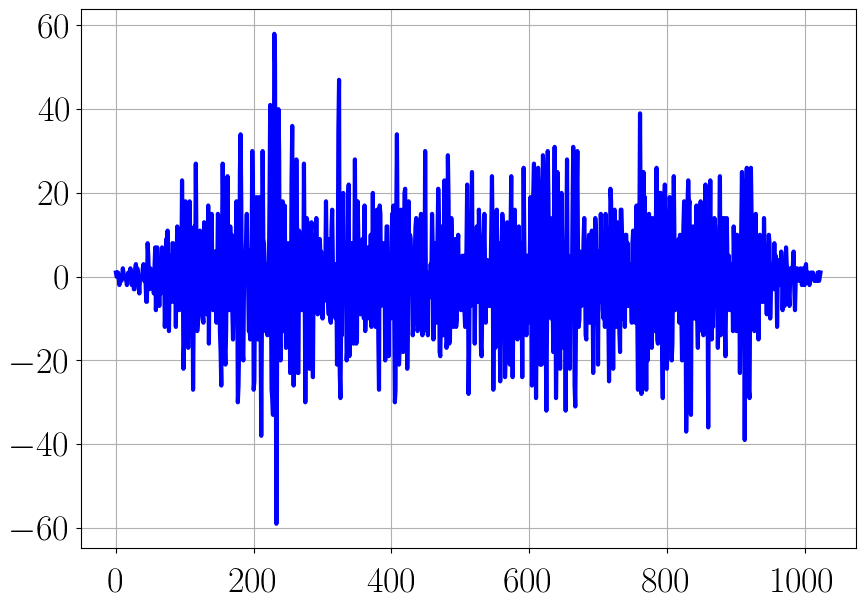

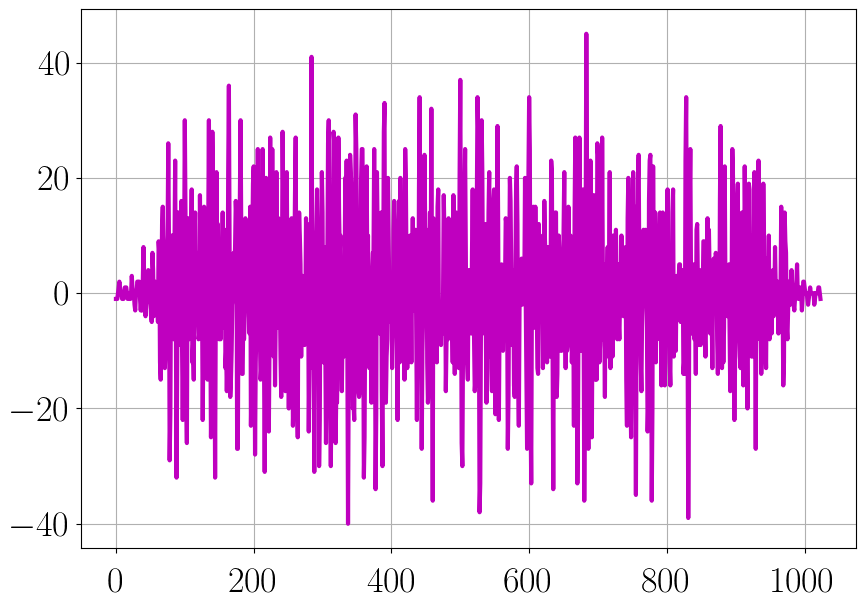

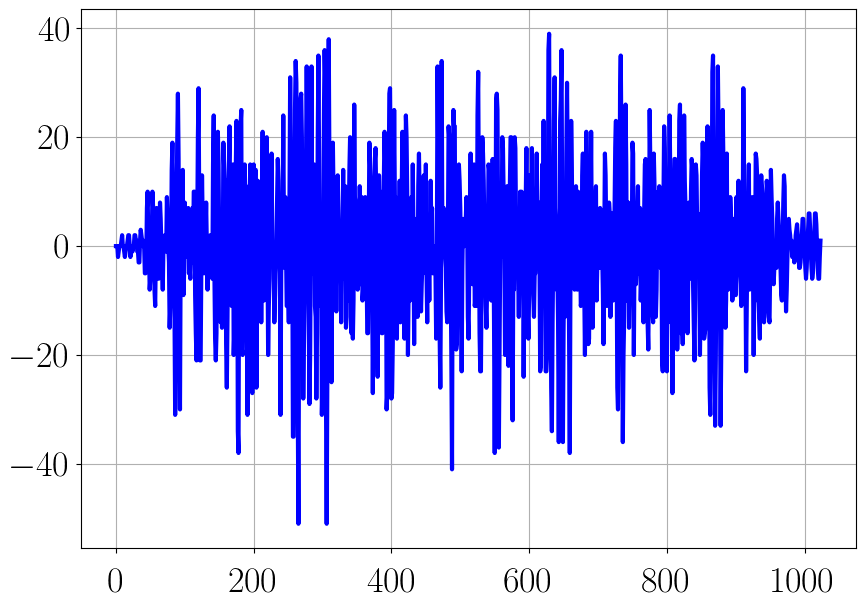

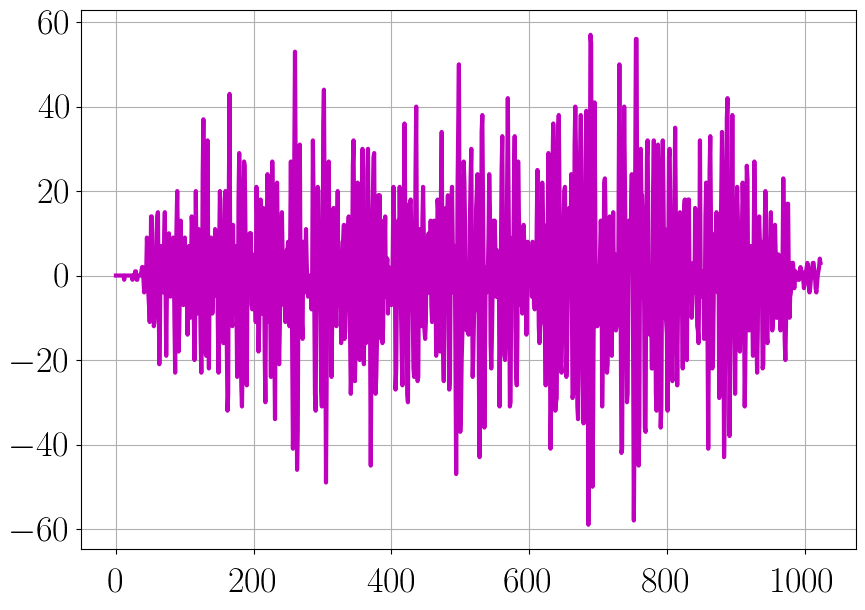

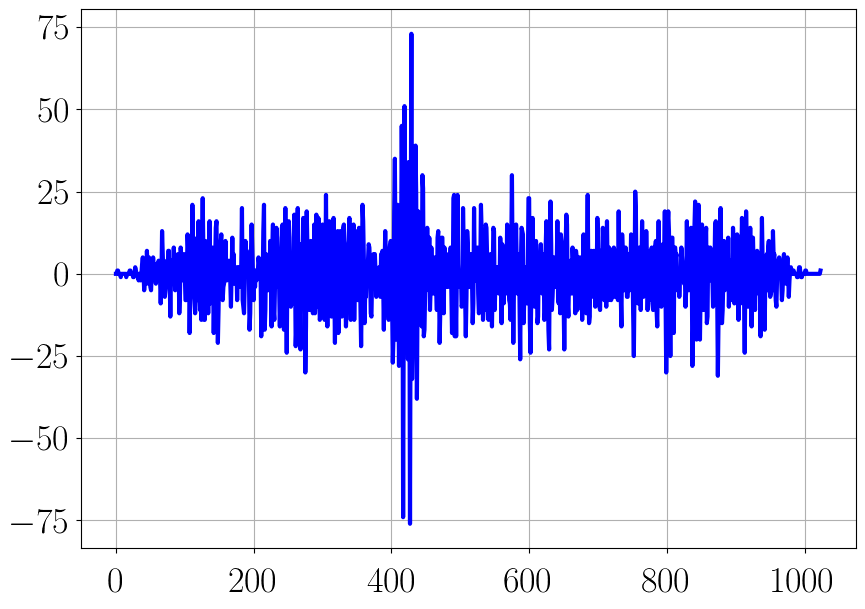

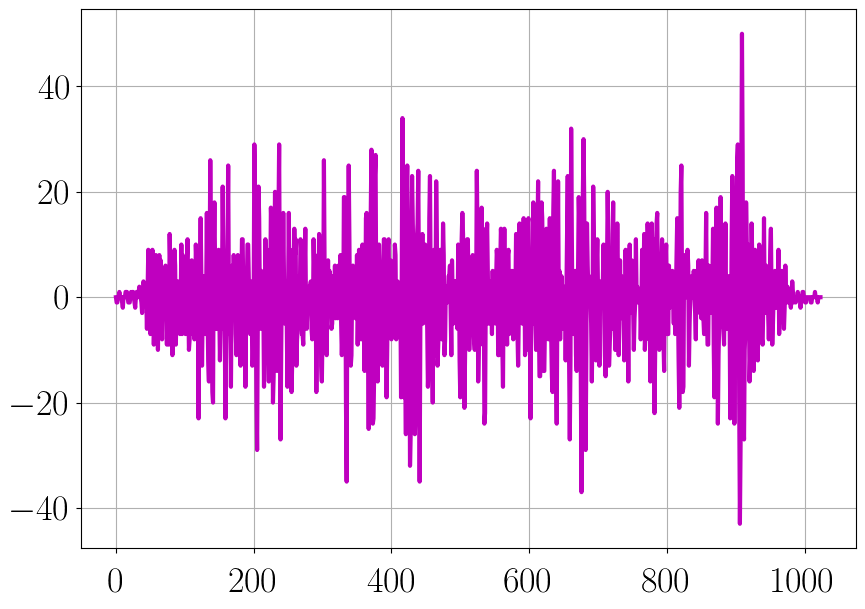

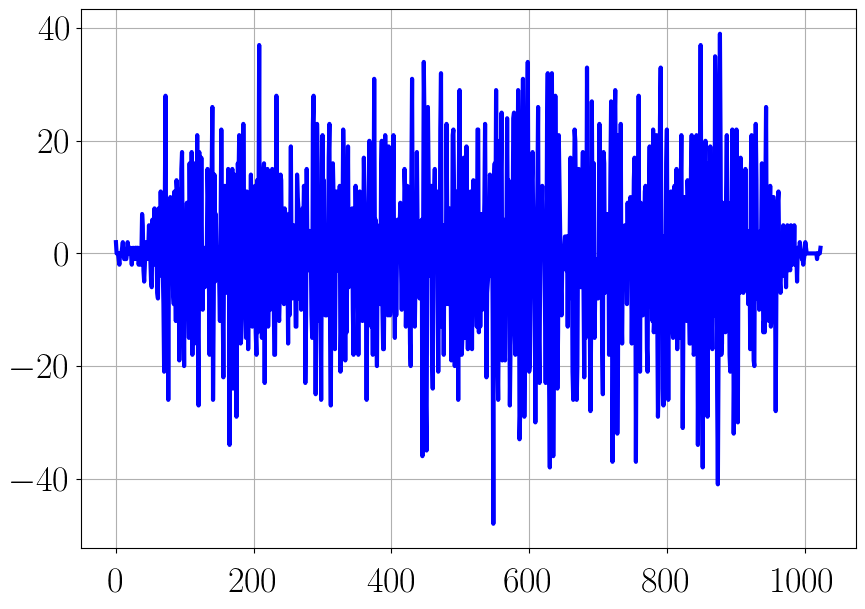

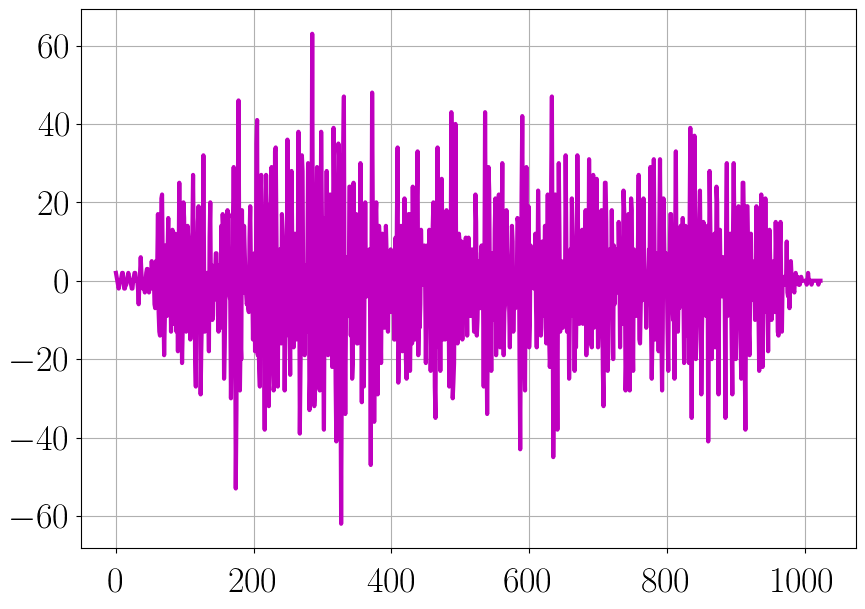

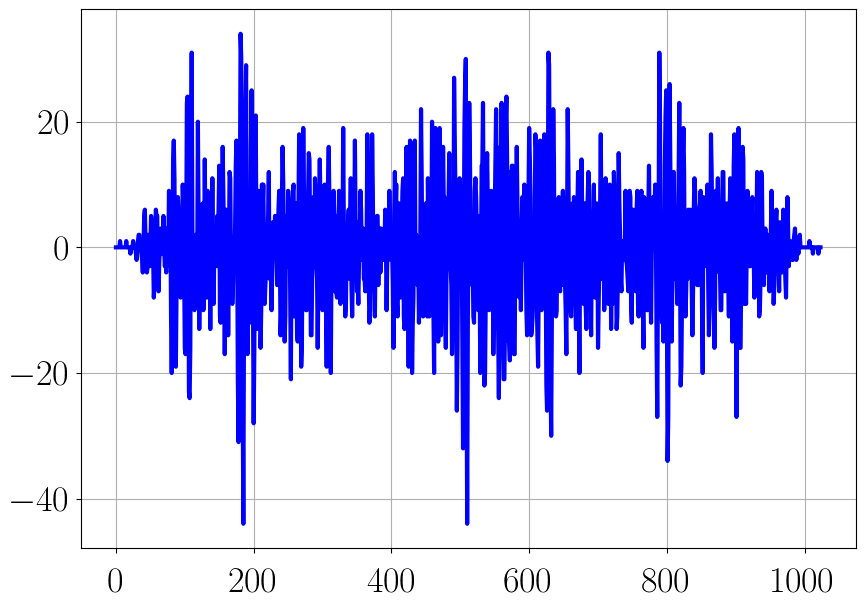

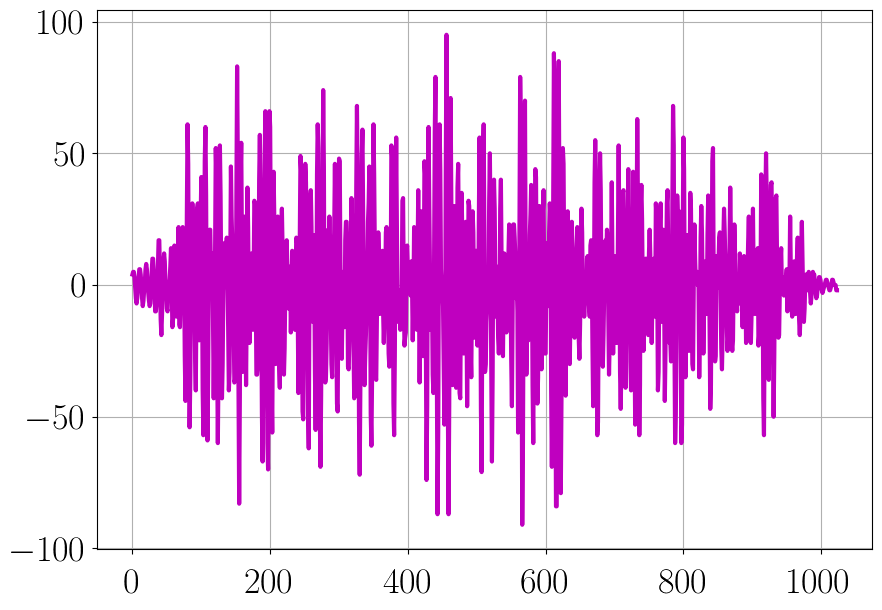

In [7]:
for i in range( len(bkg_sample) ):
    if i%100 == 0:
        plt.plot(bkg_sample[i,0],color='b')
        plt.show()
        plt.plot(bkg_sample[i,1],color='m')
        plt.show()

In [2]:
sig_pulse_file    = './sim_plus_noise_GP300_Xi_Sib_Proton_0.565_84.1_72.62_2934_seed_300.npz'
f                 = np.load(bkg_pulse_file)
sig_sample        = f['traces']
sig_pretrig_times = f['pretrig_times']
mask_trig         = f['mask_trig']

NameError: name 'bkg_pulse_file' is not defined

In [ ]:
for trace in sig_sample[mask_trig]:
    plt.plot(trace[0],color='b')
    plt.show()
    plt.plot(trace[1],color='m')
    plt.show()
    plt.plot(trace[2],color='r')
    plt.show()

In [41]:
bkg_pulse_file       = '/sps/grand/pcorrea/nutrig/datasets/bkg/bkg_pulses_gp13_2024_Jan_March_th1_60.npz'
f                    = np.load(bkg_pulse_file)
bkg_sample           = f['traces']
trigger_flags_bkg    = f['trigger_flags']
pre_trigger_time_bkg = np.argmax( np.abs(bkg_sample),axis=1 )
snr_bkg              = np.max( np.abs(bkg_sample),axis=1 )/np.sqrt( np.mean( bkg_sample[:100]**2 ) )

sig_pulse_file       = '/sps/grand/pcorrea/nutrig/datasets/sig/sig_pulses_gp13_rfv2_th1_60.npz'
f                    = np.load(sig_pulse_file)
sig_sample           = f['traces']
snr_sig              = f['snr']
trigger_flags_sig    = f['trigger_flags']
pre_trigger_time_sig = np.argmax( np.abs(sig_sample),axis=1 )

In [42]:
file_dir   = '/sps/grand/pcorrea/nutrig/template/pulse_shape_analysis/rfv2_thresh_30/'
files      = sorted( glob.glob(file_dir+'*_{}_*.npz'.format('proton')) )

energy       = np.empty(1,dtype=float)
zenith       = np.empty(1,dtype=float)
azimuth      = np.empty(1,dtype=float)
omega        = np.empty(1,dtype=float)
omega_c      = np.empty(1,dtype=float)

for file in files[:]:
    f            = np.load(file)

    energy       = np.hstack((energy,f['energy']))
    zenith       = np.hstack((zenith,f['zenith']))
    azimuth      = np.hstack((azimuth,f['azimuth']))
    omega        = np.hstack((omega,f['omega']))
    omega_c      = np.hstack((omega_c,f['omega_c']))

mask = np.where(trigger_flags_sig>0)[0]

energy       = energy[1:][mask]
zenith       = zenith[1:][mask]
azimuth      = azimuth[1:][mask]
omega        = omega[1:][mask]
omega_c      = omega_c[1:][mask]


In [43]:
trigger_flags_bkg = trigger_flags_bkg[trigger_flags_bkg>0]
trigger_flags_sig = trigger_flags_sig[trigger_flags_sig>0]
trigger_bkg_x = np.where( np.logical_or(trigger_flags_bkg==1,trigger_flags_bkg==3) )[0]
bkg_sample_x  = sig_sample[trigger_bkg_x]

trigger_sig_x = np.where( np.logical_or(trigger_flags_sig==1,trigger_flags_sig==3) )[0]
sig_sample_x  = sig_sample[trigger_sig_x]
snr_x         = snr_sig[trigger_sig_x,0]
energy_x      = energy[trigger_sig_x]


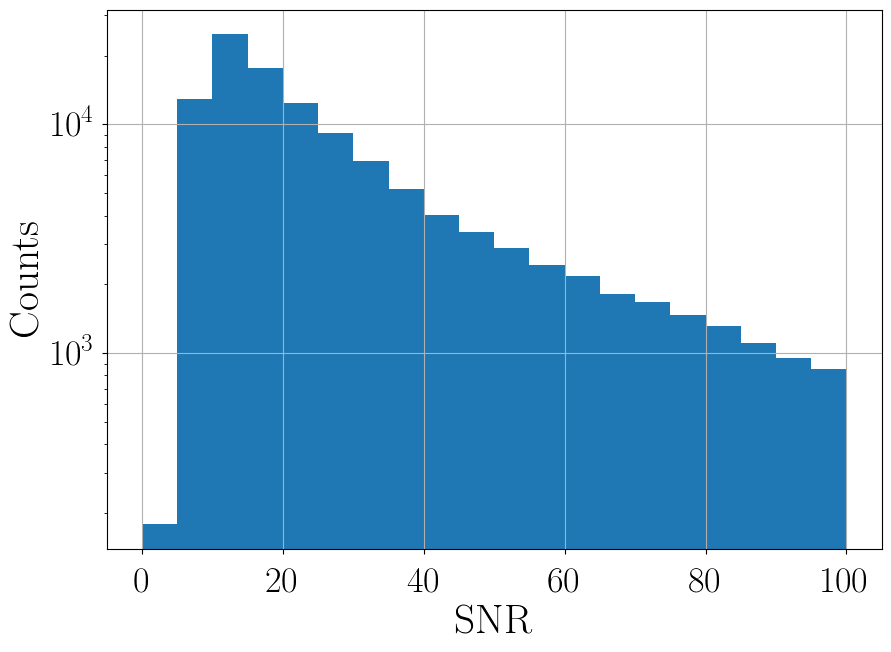

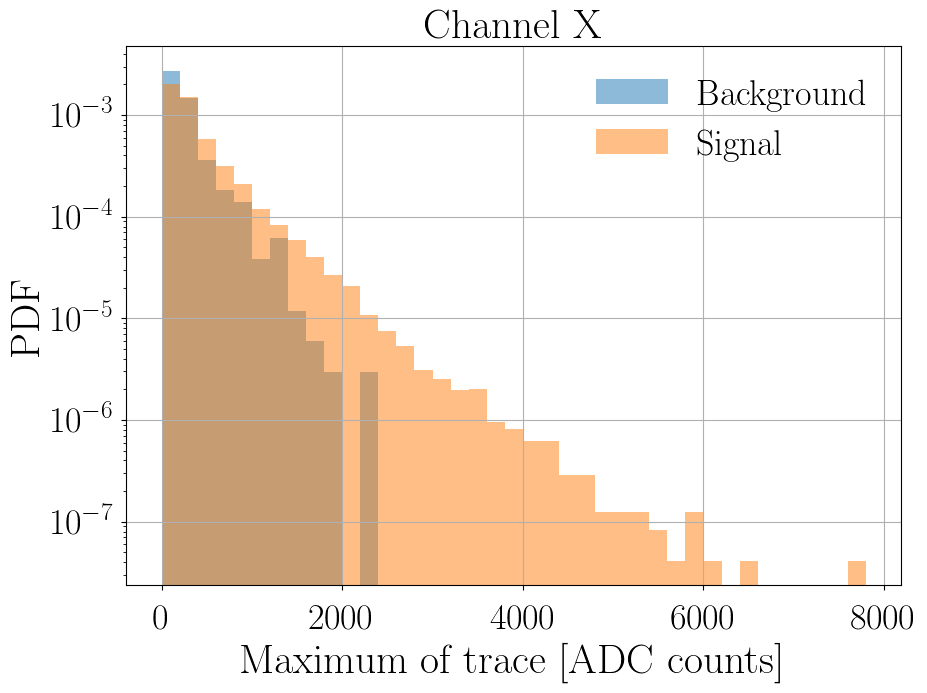

In [46]:
plt.hist(snr_x,bins=20,range=(0,100))
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

max_bkg_x = np.max(np.abs(bkg_sample_x),axis=2)[:,0]
max_sig_x = np.max(np.abs(sig_sample_x),axis=2)[:,0]
bins = np.arange(0,8000,200)

plt.hist(max_bkg_x,bins=bins,density=True,alpha=.5,label='Background')
plt.hist(max_sig_x,bins=bins,density=True,alpha=.5,label='Signal')
plt.yscale('log')
plt.xlabel('Maximum of trace [ADC counts]')
plt.ylabel('PDF')
plt.title('Channel X')
plt.legend()
plt.show()

In [47]:
np.arange(7.5,10,.1)

array([7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

/scratch/users/p/pcorrea/ipykernel_15242/1071898748.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy_x),


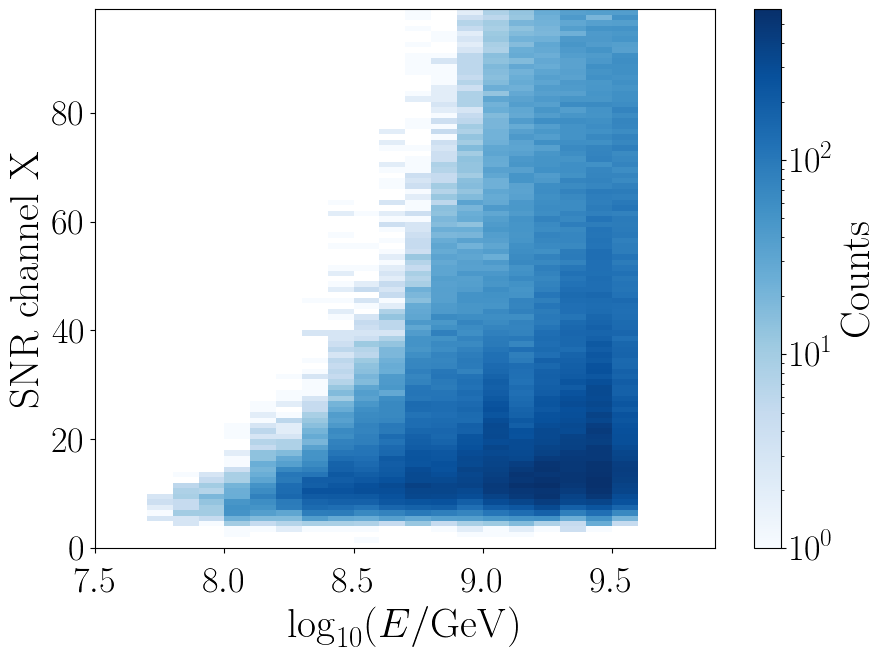

In [48]:
fig, ax = plt.subplots()

bins_log_energy = np.arange(7.5,10,.1)
bins_snr_x      = np.arange(0,100,1)

hist2d = ax.hist2d(np.log10(energy_x),
                   snr_x,
                   bins=(bins_log_energy,bins_snr_x),
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3],ax=ax,label='Counts')

#ax.set_yscale('log')

ax.set_xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
ax.set_ylabel('SNR channel X')

#ax.set_ylim([0,20])

plt.show()

In [7]:
np.random.seed(0)
idcs = np.random.randint(0,len(sig_sample),3975)

sig_sample_sel = sig_sample[idcs]
snr_sel        = snr[idcs]

Text(0.5, 1.0, 'Random selection of 3945 signal traces')

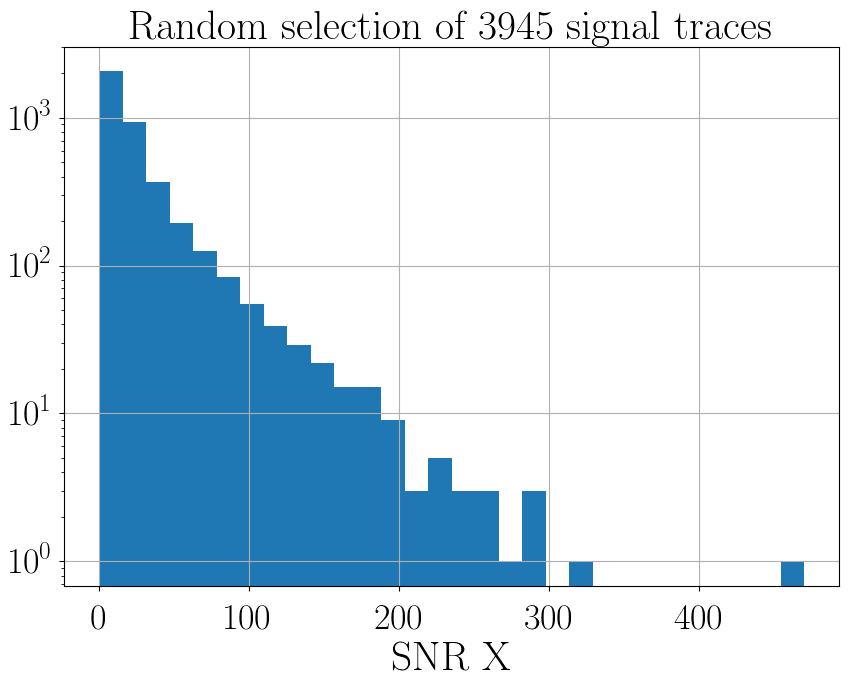

In [8]:
plt.hist(snr_sel[:,0],bins=30)
plt.yscale('log')
plt.xlabel('SNR X')
plt.title('Random selection of 3945 signal traces')

Text(0.5, 0, 'SNR X')

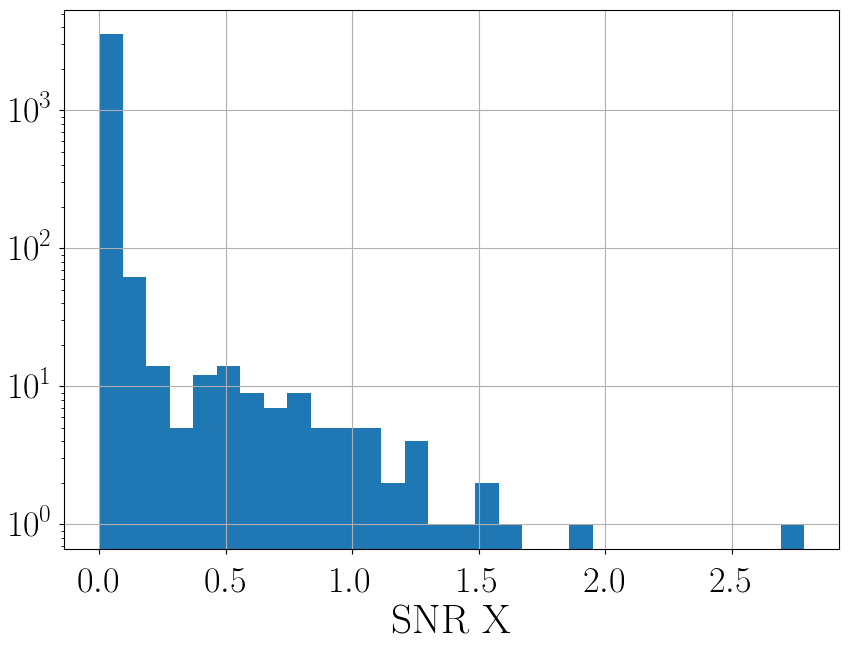

In [48]:
snr_bkg              = np.max( np.abs(bkg_sample),axis=1 )/np.sqrt( np.mean( bkg_sample[:100]**2 ) )
plt.hist(snr_bkg[:,0],bins=30)
plt.yscale('log')
plt.xlabel('SNR X')

In [10]:
bkg_file_feb_2024 = '/sps/grand/pcorrea/dc2/noise/gp13/2024-01_2024-02_night_merged/noice_traces_merged_gp13_2024_02_night_datafiles_100-105.root'
tadc              = rt.TADC(bkg_file_feb_2024)
n_entries         = tadc.get_number_of_entries()

bkg_sample_feb_2024 = np.zeros((n_entries,3,2048))

for entry in range(n_entries):
    tadc.get_entry(entry)

    bkg_sample_feb_2024[entry] = np.array(tadc.trace_ch)

In [11]:
rms_sample_feb_2024 = np.sqrt( np.mean( bkg_sample_feb_2024**2,axis=2 ) )

Text(0.5, 1.0, 'February 2024')

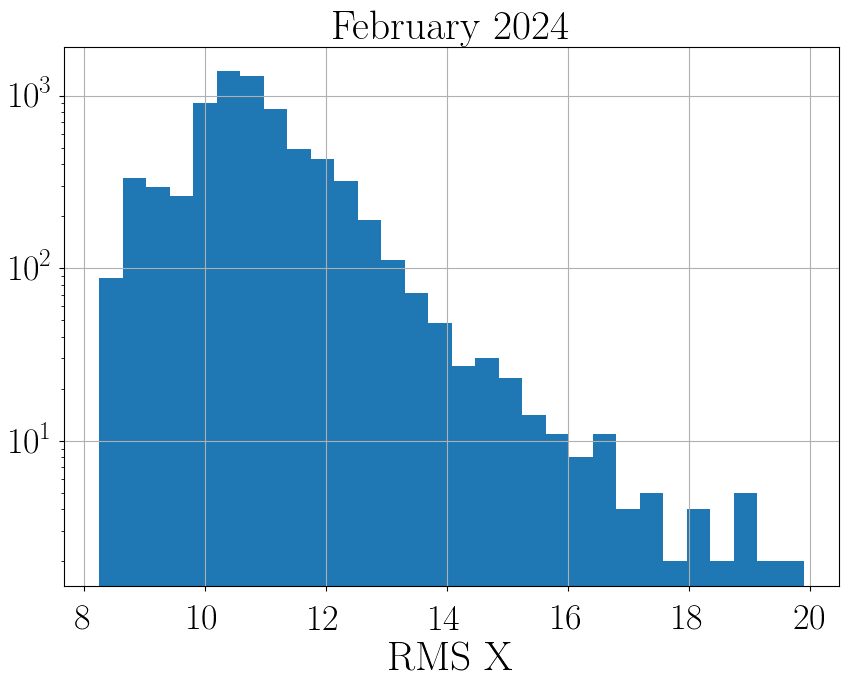

In [12]:
plt.hist(rms_sample_feb_2024[:,0],bins=30)
plt.yscale('log')
plt.xlabel('RMS X')
plt.title('February 2024')

In [13]:
bkg_file_nov_2023   = '/sps/grand/data/gp13/nov2023/20dB/npz_night/GRAND.TEST-RAW-10s-ChanXYZ_20dB_10DUs_RUN81_test.20231104000403.100_dat.npz'
f                   = np.load(bkg_file_nov_2023)
bkg_sample_nov_2023 = f['traces_x']

In [14]:
rms_sample_nov_2023 = np.sqrt( np.mean( bkg_sample_nov_2023**2,axis=1 ) )

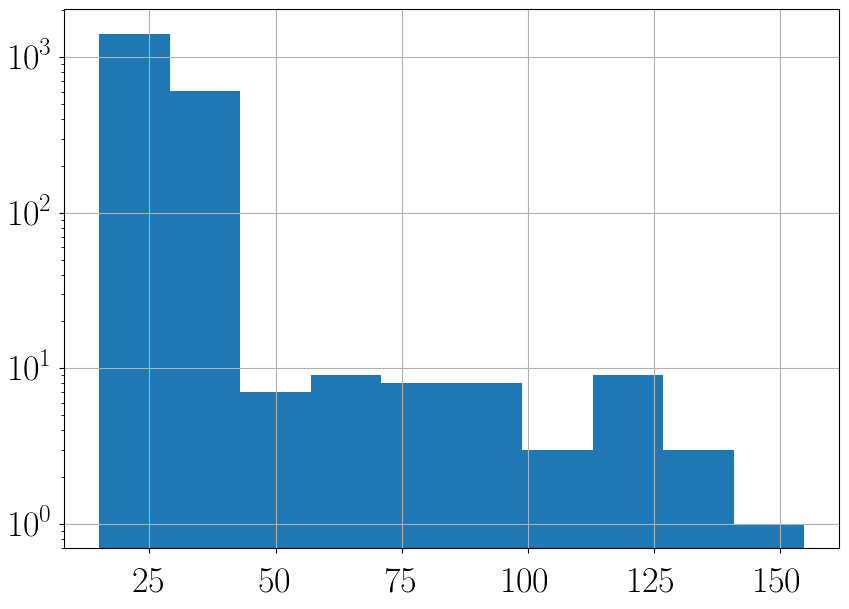

In [15]:
plt.hist(rms_sample_nov_2023)
plt.yscale('log')

(array([2.5000e+01, 2.1100e+02, 1.0660e+03, 4.4710e+03, 9.6860e+03,
        1.4694e+04, 2.1831e+04, 3.1036e+04, 4.2449e+04, 4.6530e+04]),
 array([7.53071184, 7.73763551, 7.94455918, 8.15148285, 8.35840652,
        8.56533019, 8.77225386, 8.97917753, 9.1861012 , 9.39302487,
        9.59994855]),
 <BarContainer object of 10 artists>)

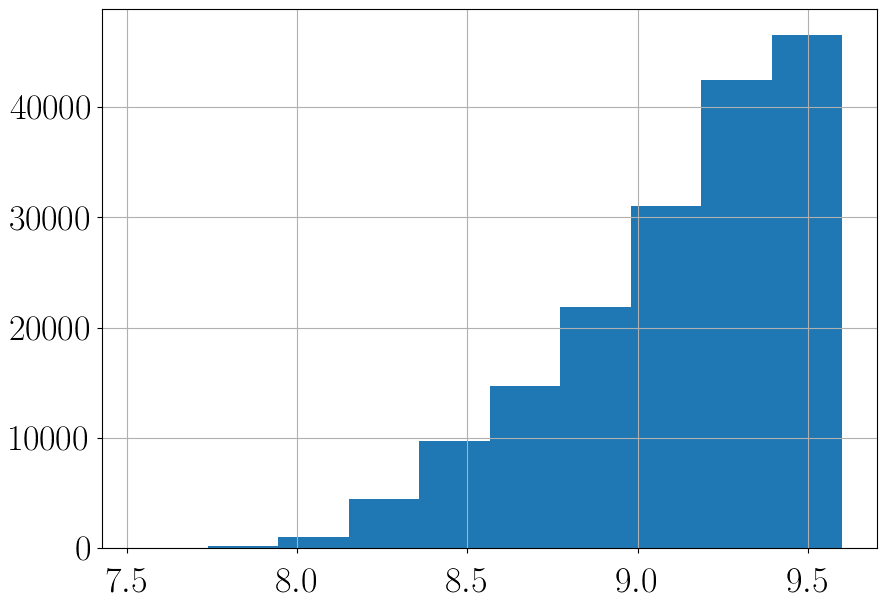

In [32]:
plt.hist(np.log10(energy))

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


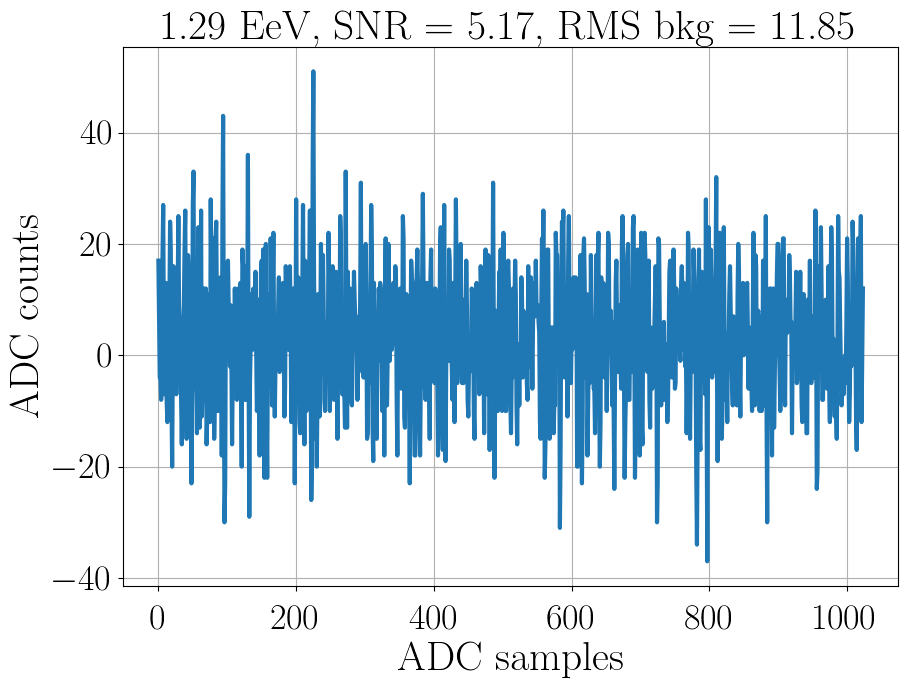

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


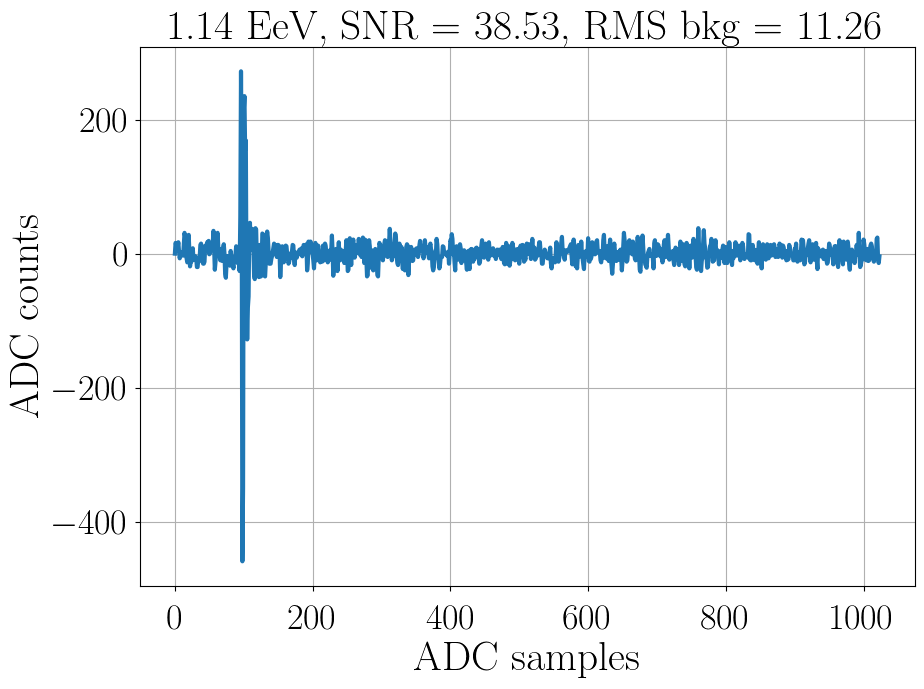

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


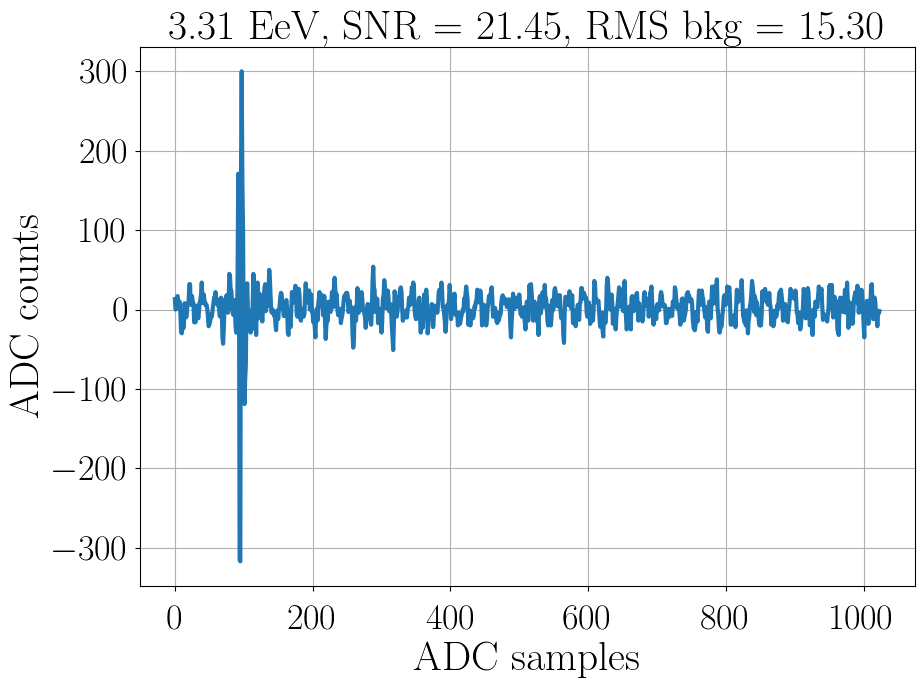

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


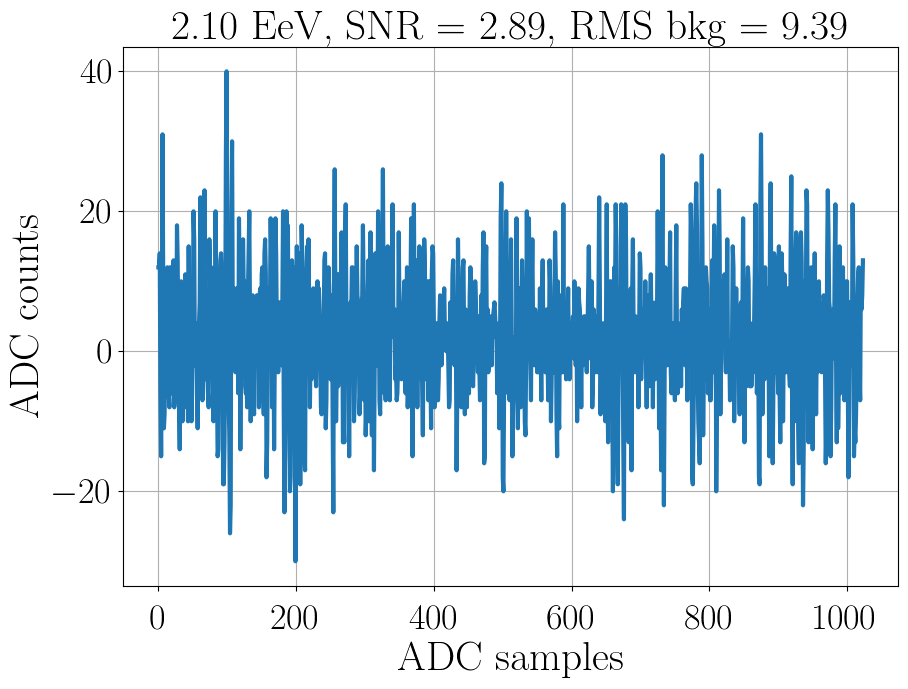

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


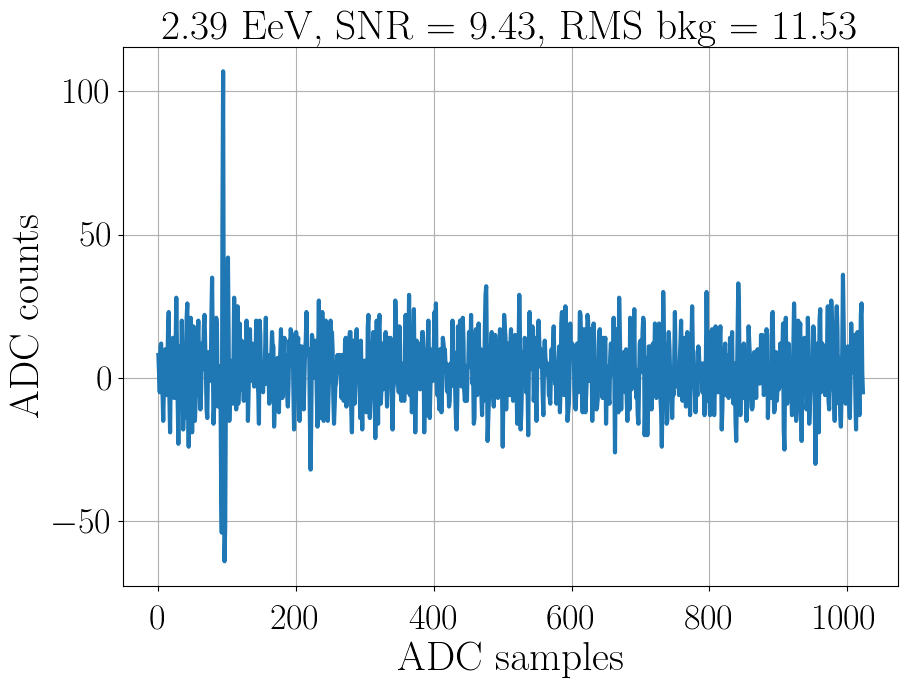

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


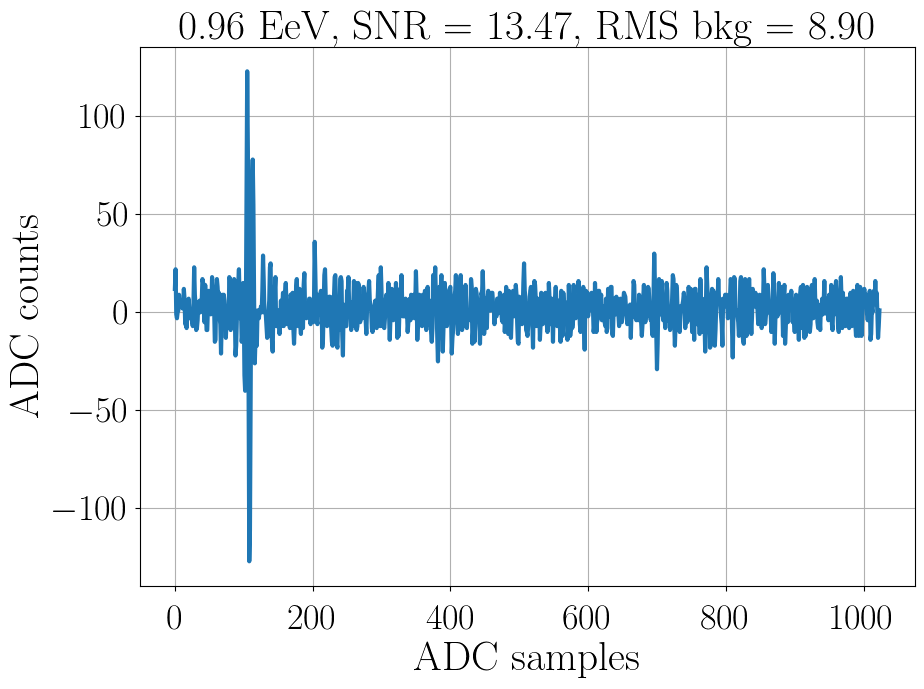

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


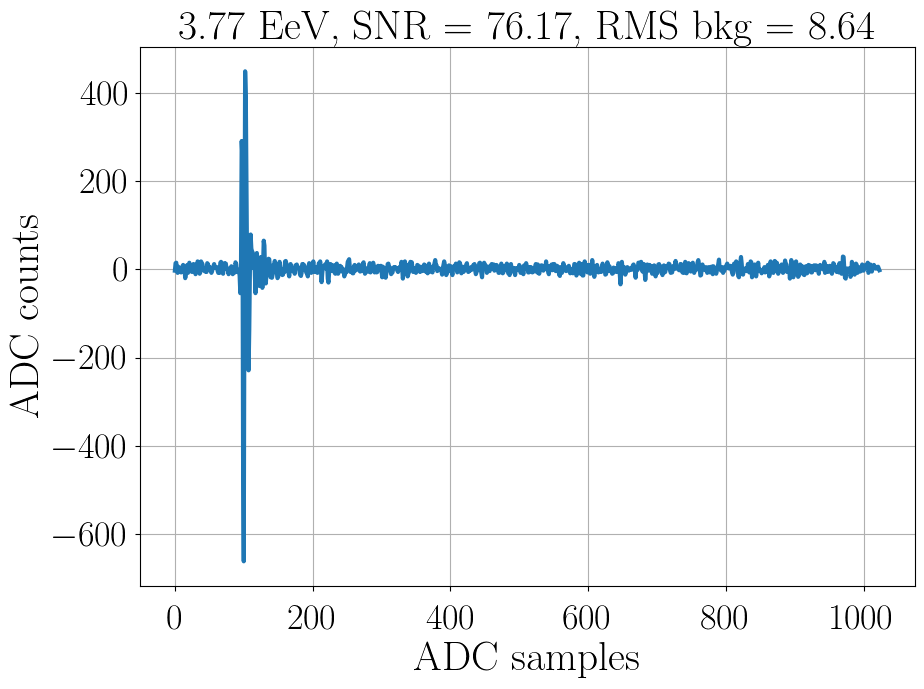

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


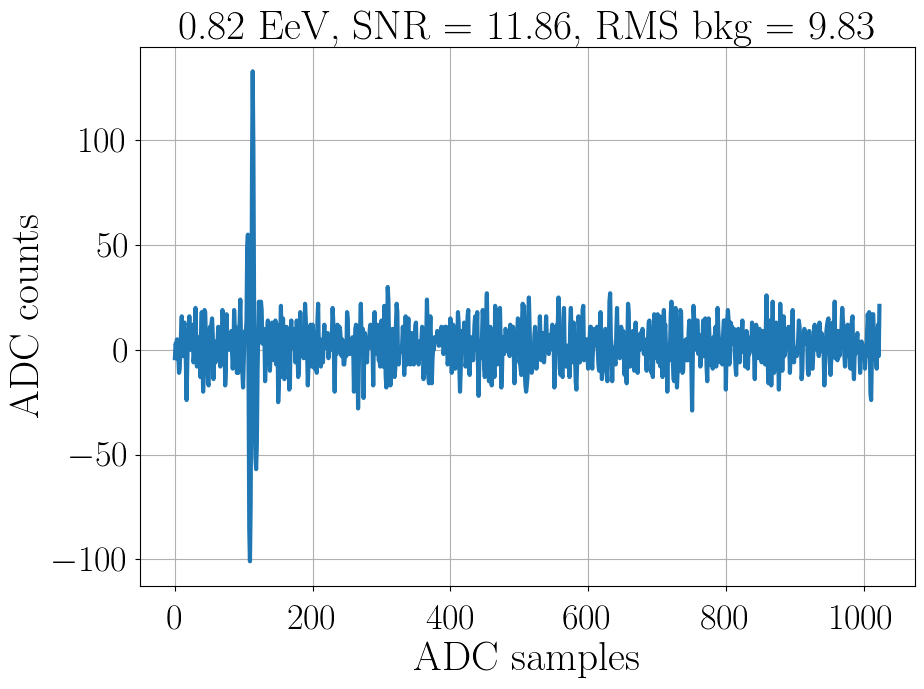

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


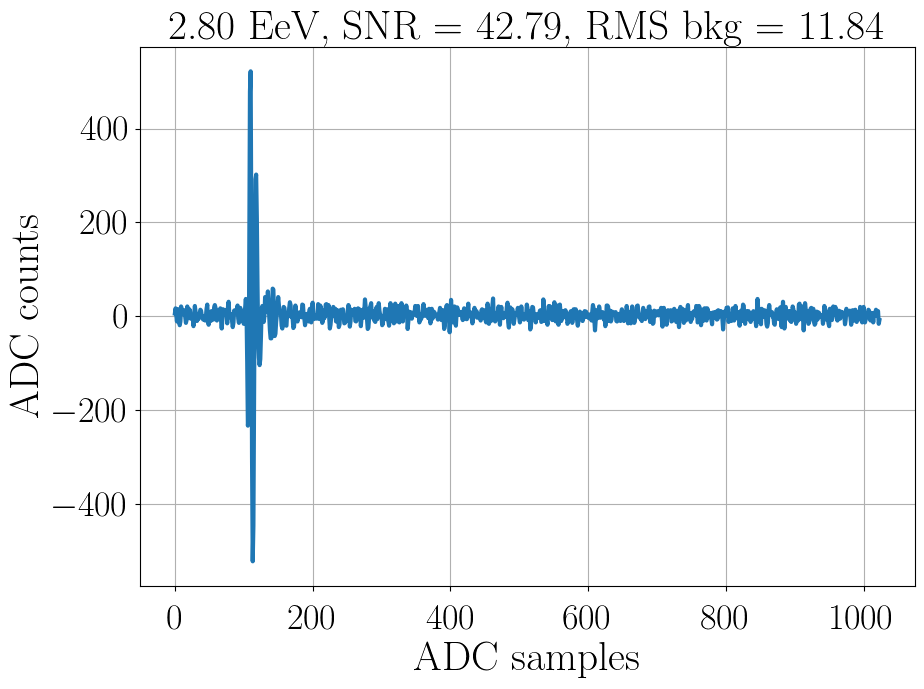

[153483 146515  68986  26519  34226 135801  79728 128810  55721  82730]


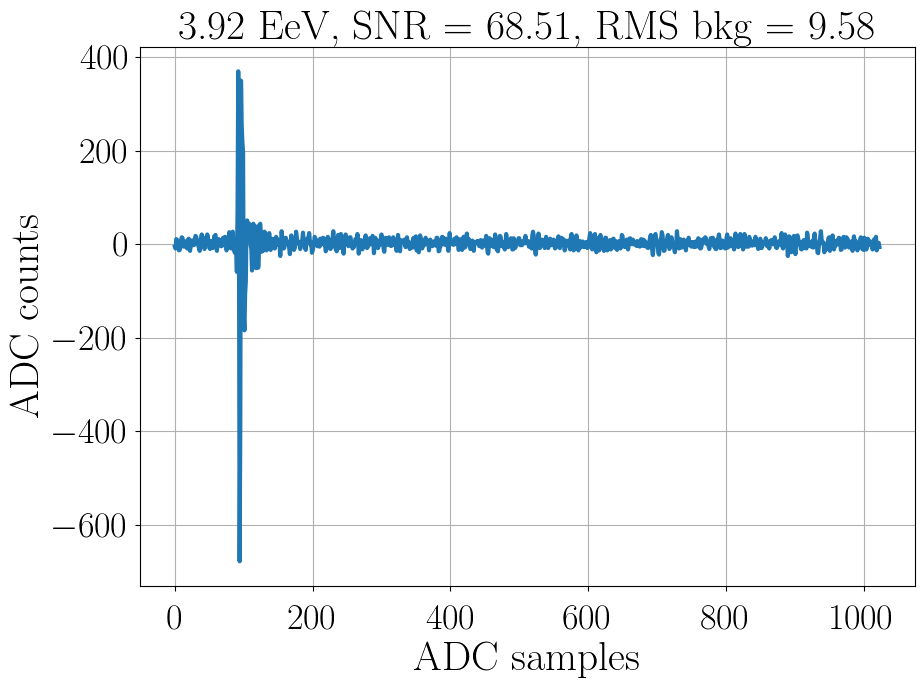

In [52]:
idx = np.random.randint(0,len(sig_sample)-1,10)

for trace, snr, E in zip(sig_sample[idx],snr_sig[idx],energy[idx]):
    print(idx)
    plt.plot(trace[0])
    std = np.std(trace[0][400:])
    rms = np.sqrt( np.mean( trace[0][400:]**2 ) )
    title = '{:.2f} EeV, SNR = {:.2f}, RMS bkg = {:.2f}'.format(E/1e9,snr[0],rms)
    plt.title(title)
    plt.xlabel('ADC samples')
    plt.ylabel('ADC counts')
    plt.show()

In [14]:
def filter_traces(trace,
                  freq_bandpass=50,
                  freqs_notch=[119,137],
                  sampling_rate=500):
    '''
    Bandpass filter above > 50 MHz to kill short waves
    Notch filters at 119 MHz and 137 MHz to kill communication lines
    '''

    b, a            = signal.butter(4,freq_bandpass,btype='high',analog=False,fs=sampling_rate)
    trace_filtered = signal.filtfilt(b,a,trace)

    for freq in freqs_notch:
        b,a            = signal.iirnotch(freq,100,fs=sampling_rate)
        trace_filtered = signal.filtfilt(b,a,trace_filtered)

    return np.trunc(trace_filtered)

In [2]:
bkg_file = '/sps/grand/data/gp13/GrandRoot/2024/02/GP13_20240218_195642_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_036_dat.root'
tadc = rt.TADC(bkg_file)
tadc.get_number_of_entries()

4588

In [5]:
b,a = signal.iirnotch(119,100,fs=500)
b_filter, a_filter = signal.butter(4,50,btype='high',analog=False,fs=500)

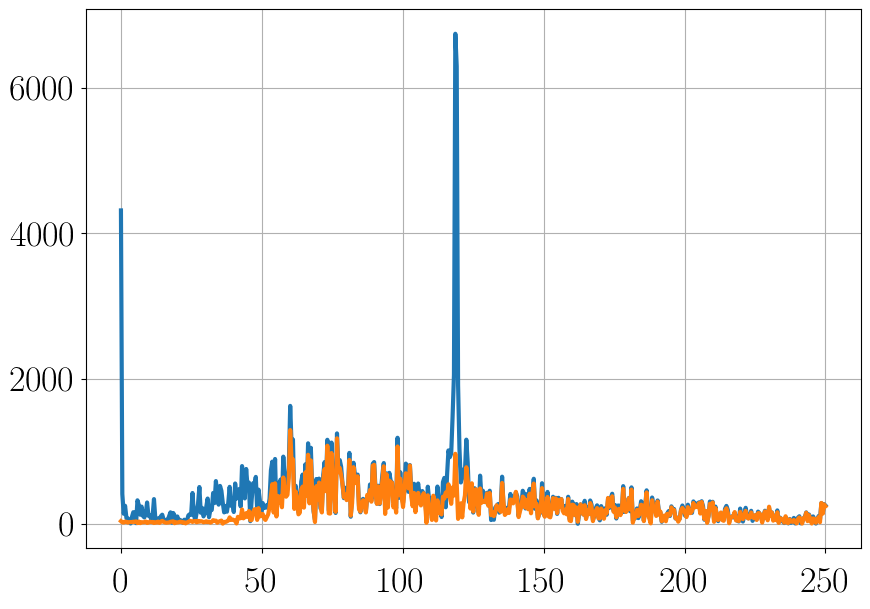

In [6]:
tadc.get_entry(1000)
trace = np.array(tadc.trace_ch[0])
trace_filtered = filter_traces(trace)

fft = np.fft.rfft(trace)
freq = np.fft.rfftfreq(1024,d=1/500)
plt.plot(freq,np.abs(fft[1]))

fft = np.fft.rfft(trace_filtered)
freq = np.fft.rfftfreq(1024,d=1/500)
plt.plot(freq,np.abs(fft[1]))

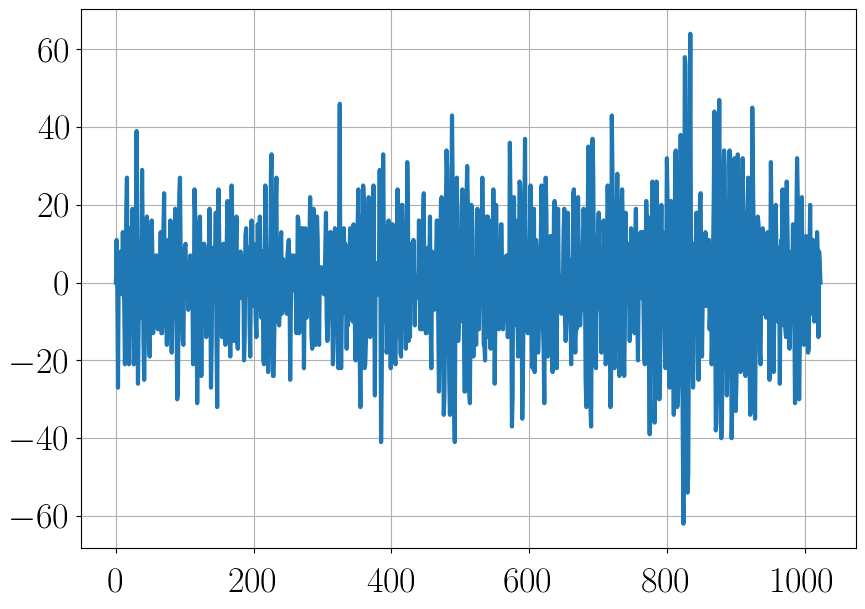

In [6]:
plt.plot(bkg_sample[1000][0])

In [32]:
f = np.load('/sps/grand/pcorrea/nutrig/datasets/sig/rfv2_thresh_30/sig_traces_adc_zhaires_proton_rfv2_thresh_30_files_0_500.npz')
traces = f['traces_adc']
f = np.load('./sig_traces_with_noise_zhaires_proton_rfv2_thresh_30_files_0_500_seed_0.npz')
traces_with_noise = f['traces']
snr = f['snr']

(100.0, 300.0)

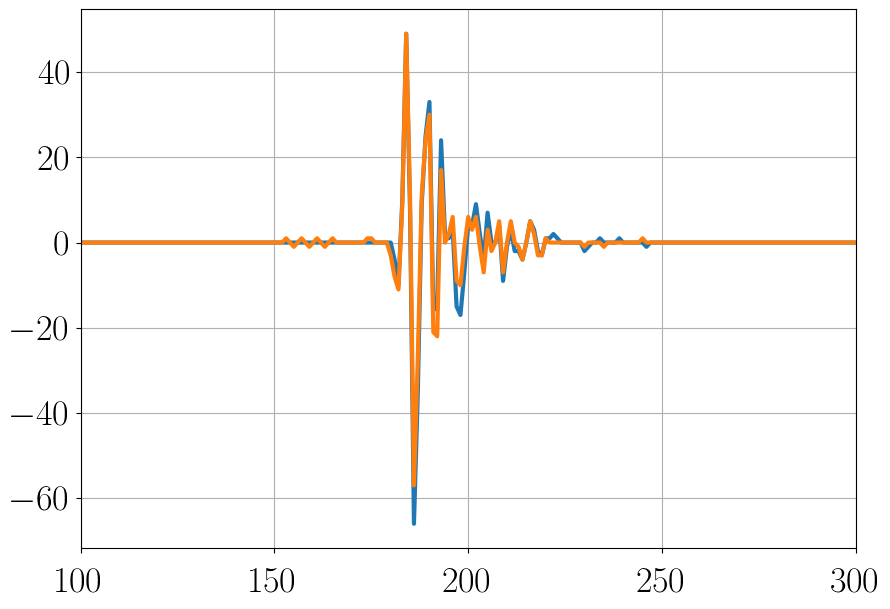

In [33]:
tr = traces[208][0]

plt.plot(tr)
plt.plot(filter_traces(tr))

plt.xlim([100,300])

13.403372360156231
62.0
3.133710516965862


(600.0, 800.0)

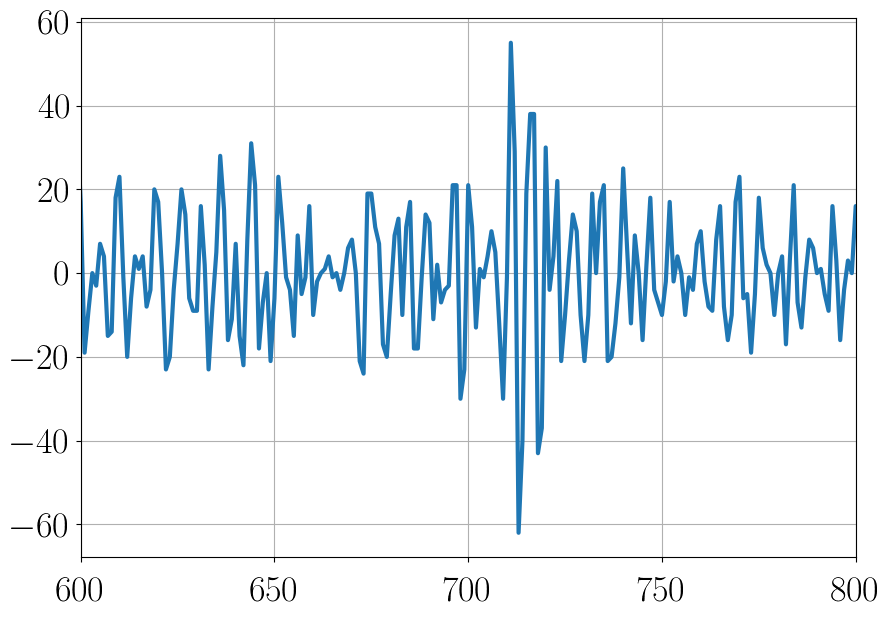

In [35]:
tr_with_noise = traces_with_noise[208][0]
print( np.sqrt(np.mean(tr_with_noise**2)) )
print( np.max(np.abs(tr_with_noise)) )
print(snr[208][0])
plt.plot(tr_with_noise)
plt.xlim([600,800])

(array([58., 33., 25., 25., 29., 20., 11.,  8.,  0.,  1.]),
 array([0.        , 0.31337105, 0.6267421 , 0.94011316, 1.25348421,
        1.56685526, 1.88022631, 2.19359736, 2.50696841, 2.82033947,
        3.13371052]),
 <BarContainer object of 10 artists>)

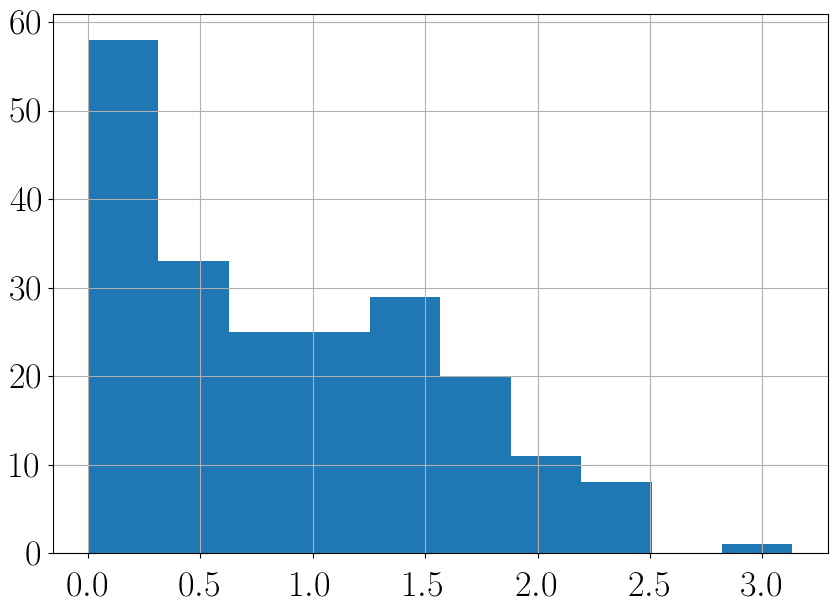

In [28]:
plt.hist(snr[:,0])

In [71]:
file = '/sps/grand/pcorrea/nutrig/datasets/bkg/test_filter/GP13_20240216_161643_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_034_dat_raw.npz'
#file = '/sps/grand/pcorrea/nutrig/datasets/bkg/test_filter/GP13_20240218_023353_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_021_dat_raw.npz'

#file = '/sps/grand/pcorrea/nutrig/datasets/bkg/test_filter/GP13_20240216_161643_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_034_dat_filtered.npz'
#file = '/sps/grand/pcorrea/nutrig/datasets/bkg/test_filter/GP13_20240218_023353_RUN125_MD_RAW_10s_ChanXYZ_20dB_12DUs_test_021_dat_filtered.npz'

f = np.load(file)
traces = f['traces']

fft  = np.fft.rfft(traces)
freq = np.fft.rfftfreq(1024,d=1/500)

traces_filtered = tools.filter_traces(traces,freqs_notch=[119,137,133])
fft_filtered    = np.fft.rfft(traces_filtered)

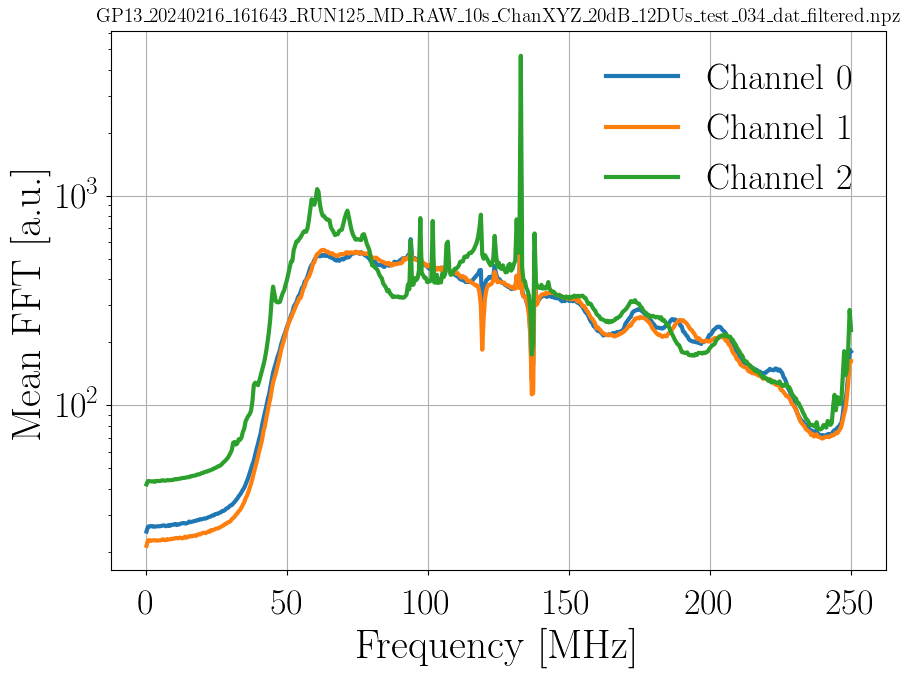

In [72]:
fft_mean = np.mean(np.abs(fft),axis=0)

for ch in range(fft_mean.shape[0]):
    plt.plot(freq,fft_mean[ch],label=f'Channel {ch}')

plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean FFT [a.u.]')
plt.legend()
plt.title(os.path.basename(file).replace('_raw.npz','.root'),fontsize=14)
#plt.xlim([130,140])
plt.show()

In [ ]:
fft_mean = np.mean(np.abs(fft_filtered),axis=0)

for ch in range(fft_mean.shape[0]):
    plt.plot(freq,fft_mean[ch],label=f'Channel {ch}')

plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean FFT [a.u.]')
plt.legend()
plt.title(os.path.basename(file).replace('_raw.npz','.root'),fontsize=14)
#plt.xlim([130,140])
plt.show()

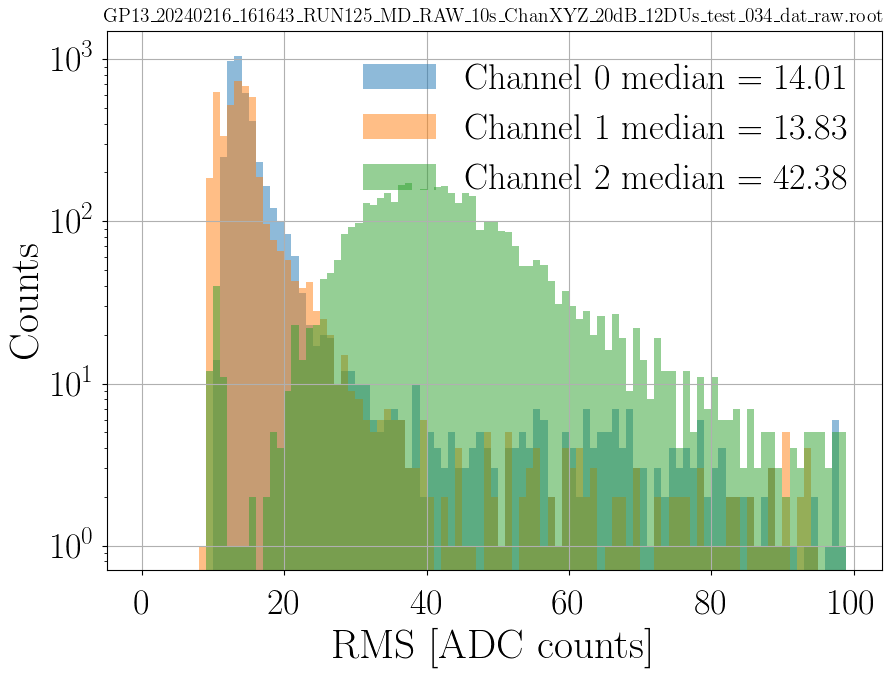

In [65]:
rms = np.sqrt( np.mean( traces**2,axis=2 ) )
bins = np.arange(0,100)

for ch in range(rms.shape[1]):
    median = np.median(rms[:,ch])
    plt.hist(rms[:,ch],bins=bins,alpha=.5,label=f'Channel {ch} median = {np.round(median,decimals=2)}')

plt.yscale('log')
plt.xlabel('RMS [ADC counts]')
plt.ylabel('Counts')
plt.title(os.path.basename(file).replace('.npz','.root'),fontsize=14)
plt.legend()
plt.show()